## <font color=Blue>Project Details</font>

**Project Statement** : The project aims to employ Legal Analytics in order to predict the winning party given a case. The primary objective of a Law Firm is to fight cases where chances of success is high. Appropriate analysis and Machine Learning models aid a firm or a lawyer to make an informed choice based on historical data and sound statistical analysis. 

**Dataset Details** : The database used dates back to the year 1946 during the  beginning of Vinston Court and Warren Court. There have been many versions since then. The data available can be used with various statistical packages to perform various analyses with respect to what the business/ Law firm considers important. The advanced modelling and EDA techniques used in the project will enable the business to calculate and view relationships among the variables which shall aid the management in making informed decisions. Though the database was created in 1946, the data consists of information which extends to over four centuries (from 1791). Thus with increase in information, the needed responsibility to alter/ transform the data is carried out

**Complexity Involved**
<br>

0. Find the key area, gaps identified in the topic survey where the project can add value to the customers and business. 
1. Since datasets involving court cases have multiple variables, the variables that aid in the prediction of "partyWinning" has to be selected
    - Certain predictor variables involve information that a law firm may not have access to, before the case begins in the supreme court. Hence these variables are removed
    
2. Merging of different columns so that it makes sense which further reduces processing and execution time and then building an accurate model with decent respective model scores using required libraries and algorithms.
    - To obtain duration of the case , various columns were merged through appropriate datetime techniques.
    
3. Since each column is unique, the null value imputation was done dilligently using hot deck imputation.
4. Finding out the best target variable as the dataset contained multiple potential target variables.




**Project Outcome**
- Commercial : Given the details of a case, the law firm will be able to predict the outcome which shall enable the agency to maintain a better track record and select cases where the chances of winning are high.
- Social : Should the petitioner reconsider filing a case based on model results. This will help the petitioner in saving time and money. Hence the law firm will be able to provide alternate solutions to the petitioner and gain reputation for the same.

<br>

---

## <font color=blue>1. Import all Libraries</font>

In [1]:
#--------------------------------------------------------GENERAL----------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')


##--------------------------------------- Linear Model, Assumptions -----------------------------------------------------
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.tsa.api as smt
import statsmodels.api as sm  
import statsmodels.stats.api as sms
import statsmodels
import scipy.stats as stats

##--------------------------------------- FEATURE SELECTION ------------------------------------------------------------

from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif


##--------------------------------------- Preprocessing ----------------------------------------------------------------
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler


##--------------------------------------- Model Selection --------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import StratifiedKFold


##--------------------------------------- Trees and Ensemble methods----------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from IPython.display import Image  
from sklearn.tree import export_graphviz
from catboost import CatBoostRegressor,CatBoostClassifier


##--------------------------------------- Naive Bayes-------------------------------------------------------------------
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

##--------------------------------------- KNN--------------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

##---------------------------------------METRICS-----------------------------------------------------------------------
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,roc_auc_score, roc_curve,classification_report


##---------------------------------------USL KMeans,Agglomerative, Dendrogram------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


##---------------------------------------Data Imbalance-----------------------------------------------------------------
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids

<br>

---


<br>

## <font color=blue>2. Load Dataset</font>

In [2]:
df = pd.read_csv("proj.csv",encoding='ISO-8859-1')

In [3]:
df.head(2)

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,10/23/1946,198,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. § 33,78.0,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,10/23/1946,198,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. § 33,78.0,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN


In [4]:
df.shape

(80845, 61)

<br>

**Variable categorization (count of numeric and categorical)**

In [5]:
cat=df.select_dtypes(include='object')
num=df.select_dtypes(exclude='object')


In [6]:
print("\033[1m The categorical (string based) columns are \033[0m : \n", list(cat.columns))
print()
print("\033[1m The number of categorical(string) columns are : \033[0m",len(cat.columns))

 The categorical (string based) columns are  : 
 ['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'chief', 'docket', 'caseName', 'dateArgument', 'dateRearg', 'lawMinor', 'justiceName']

 The number of categorical(string) columns are :  16


In [7]:
print("\033[1m The numerical ( Nominal or Ordinal) columns are \033[0m \n : ", list(num.columns))
print()
print("\033[1m The number of numerical columns are \033[0m : ",len(num.columns))

 The numerical ( Nominal or Ordinal) columns are  
 :  ['decisionType', 'term', 'naturalCourt', 'petitioner', 'petitionerState', 'respondent', 'respondentState', 'jurisdiction', 'adminAction', 'adminActionState', 'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource', 'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition', 'lcDispositionDirection', 'declarationUncon', 'caseDisposition', 'caseDispositionUnusual', 'partyWinning', 'precedentAlteration', 'voteUnclear', 'issue', 'issueArea', 'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2', 'lawType', 'lawSupp', 'majOpinWriter', 'majOpinAssigner', 'splitVote', 'majVotes', 'minVotes', 'justice', 'vote', 'opinion', 'direction', 'majority', 'firstAgreement', 'secondAgreement']

 The number of numerical columns are  :  45


---

<br>

---

## <font color=blue>3. Columns to be removed ( based on Null values and use )</font>
**Benchmark used to remove columns**
- If the column has more than 85% Null values
- If the column is not useful for classification purpose

---

## <font color=blue>4. Columns to keep</font>
**Benchmark used to keep columns**
- The percentage of null values were minimal.
- The predictor variables seemed to have an influence on the target variable - partyWinning

1. voteId : feature engineering --> last 2 digits
2. datedecision 
3. decisionType
4. naturalCourt
5. term
6. chief
7. dateArgument
8. petitioner	
10. respondent	
11. jurisdiction
12. threeJudgeFdc
13. caseSource
14. lcDisagreement 
15. certReason   
16. lcDisposition
17. lcDispositionDirection
18. declarationUncon
19. caseDisposition
20. caseDispositionUnusual
21. **partyWinning**
22. precedentAlteration
23. voteUnclear
24. issue
25. issueArea
26. decisionDirection  
27. decisionDirectionDissent 
29. authorityDecision1
30. lawType
31. majVotes
32. minVotes
33. vote
34. opinion
35. direction
36. majority









In [8]:
len(["dateRearg","adminActionState","firstAgreement","secondAgreement","docketId","caseId","caseIssuesId","usCite","sctCite","ldCite","lexisCite","docket","caseName","petitionerState","respondentState","adminAction","caseOrigin","caseOriginState","caseSourceState","authorityDecision2","lawSupp","lawMinor","majOpinWriter","majOpinAssigner","justice","justiceName","splitVote"])

27

In [9]:
new_df = df.drop(["dateRearg","adminActionState","firstAgreement","secondAgreement","docketId","caseId","caseIssuesId","usCite","sctCite","ledCite","lexisCite","docket","caseName","petitionerState","respondentState","adminAction","caseOrigin","caseOriginState","caseSourceState","authorityDecision2","lawSupp","lawMinor","majOpinWriter","majOpinAssigner","justice","justiceName","splitVote"],axis=1)

In [10]:
new_df.shape

(80845, 34)

<br>

---

## <font color=blue>5. Split data primarily into train and test</font>

- The data is split into train and test.
- The computation is done seperately for train dataset as we want to avoid the phenomenon of data leakage.

In [11]:
new_df = new_df[new_df.partyWinning.notna()]


In [12]:
new_df.partyWinning.value_counts()

1.0    51620
0.0    29036
2.0       45
Name: partyWinning, dtype: int64

<br>

### 5.1 Rare Target class
1. PartyWinning=2 means 'favorable disposition for petitioning party unclear'
2. PartyWinning is a rare occurance in our dataset.
3. Hence it is removed to avoid overfitting. ( Can happen in tree based models)

<br>

In [13]:
new_df = new_df[new_df.partyWinning!=2]

In [14]:
new_df.partyWinning.value_counts()

1.0    51620
0.0    29036
Name: partyWinning, dtype: int64

In [15]:
X = new_df.drop("partyWinning",axis=1)
Y = new_df.partyWinning

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.4,random_state=4)


---

## <font color=blue>6. Null value Imputation</font>

- A function which performs hot_deck imputation is applied.
- The median, mode values are also obtained from the train dataset in order to avoid data leakage

In [16]:
def hot_deck_imputation_mode(df,y,col):
    a = df[y==1][col].mode()[0]
    b = df[y==0][col].mode()[0]
    #c = df[y==2][col].mode()[0]
    
    values =[]
    for i in range(len(df)):
        if pd.isna(df[col][i])==True:
            
            if y[i]==1:
                values.append(a)
            elif y[i]==0:
                values.append(b)
            elif y[i]==2:
                values.append(c)
            
        else:
            values.append(df[col][i])
    
    df[col] = values
    return df
    
            

In [17]:
# def hot_deck_imputation_median(df,col):
#     a = int(xtrain[ytrain==1][col].median())
#     b = int(xtrain[ytrain==0][col].median())
#     c = int(xtrain[ytrain==2][col].median())
    
#     values =[]
#     for i in range(len(df)):
#         if pd.isna(df[col][i])==True:
            
#             if y[i]==1:
#                 values.append(a)
#             elif y[i]==0:
#                 values.append(b)
#             elif y[i]==2:
#                 values.append(c)
#         else:
#             values.append(df[col][i])
            
#     df[col] = values
#     return df
    
    
            

---

### 1. Respondent 
### 2. Petitioner
- "Respondent" refers to the party being sued or tried and is also known as the appellee. 
- "Petitioner" refers to the party who petitioned the Supreme Court to review the case.

In [18]:
xtrain = xtrain.drop(["respondent","petitioner"],axis=1)

In [19]:
xtest = xtest.drop(["respondent","petitioner"],axis=1)

- We have removed the columns as they do not influence the target variable.


In [20]:
new_df.columns

Index(['voteId', 'dateDecision', 'decisionType', 'term', 'naturalCourt',
       'chief', 'dateArgument', 'petitioner', 'respondent', 'jurisdiction',
       'threeJudgeFdc', 'caseSource', 'lcDisagreement', 'certReason',
       'lcDisposition', 'lcDispositionDirection', 'declarationUncon',
       'caseDisposition', 'caseDispositionUnusual', 'partyWinning',
       'precedentAlteration', 'voteUnclear', 'issue', 'issueArea',
       'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1',
       'lawType', 'majVotes', 'minVotes', 'vote', 'opinion', 'direction',
       'majority'],
      dtype='object')

### 3. VoteID
- The first four digits are the term. 
- The next four are the case within the term (starting at 001
and counting up). 
- The next two are the number of dockets consolidated under the U.S.
- The next two are the number of issues and legal provisions within the case (starting at 01 and counting up). 
- The next two indicate a split vote within an issue or legal provision (01 for only one vote; 02 if a split vote). 
- **The final two represent the vote in the case (usually runs 01 to 09, but fewer if less than all justices participated)**

Hence we are concerned about the last 2 numbers that provide information about the number of justices who participated in the case

In [21]:
"1946-001-01-01-01-01".split("-")[-1]

'01'

In [22]:
xtrain["vote_id_num_of_Justices"] = xtrain["voteId"].apply(lambda x:int(x.split("-")[-1]))
xtrain.drop("voteId",axis=1,inplace=True)

In [23]:
xtest["vote_id_num_of_Justices"] = xtest["voteId"].apply(lambda x:int(x.split("-")[-1]))
xtest.drop("voteId",axis=1,inplace=True)

In [24]:
xtrain.shape, xtest.shape

((48393, 31), (32263, 31))

<br>

### 4. 5. 6. 'dateDecision' 'dateArgument' 'term'
- **dateDecision**  : This variable contains the day, month, and year that the case was orally argued before the Court.
- **dateArgument** : This variable contains the year, month, and day that the Court announced its decision in the case.
- **Term** : This variable identifies the term in which the Court handed down its decision.

The columns are used to compute thr duration of the case

In [25]:
xtrain["duration_of_case"] = pd.to_datetime(xtrain['dateDecision'])-pd.to_datetime(xtrain['dateArgument'])
xtest["duration_of_case"] = pd.to_datetime(xtest['dateDecision'])-pd.to_datetime(xtest['dateArgument'])

In [26]:
xtrain["duration_of_case"] =xtrain["duration_of_case"].apply(lambda x:x.days)
xtest["duration_of_case"] =xtest["duration_of_case"].apply(lambda x:x.days)

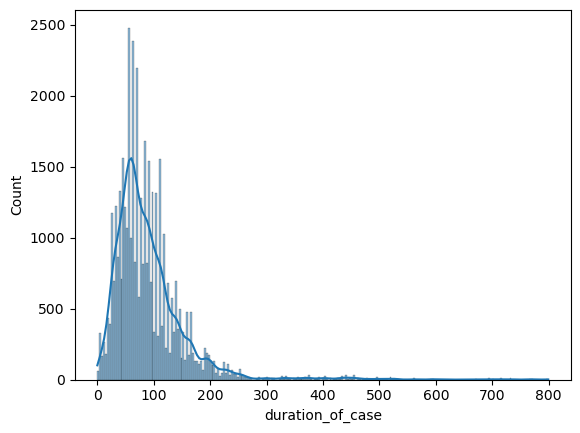

In [27]:
sns.histplot(xtrain["duration_of_case"],kde=True)
plt.show()

In [28]:
xtrain["duration_of_case"].fillna(xtrain["duration_of_case"].median(),inplace=True)
xtest["duration_of_case"].fillna(xtrain["duration_of_case"].median(),inplace=True)

In [29]:
xtrain.drop(['dateDecision','dateArgument','term'],axis=1,inplace=True)
xtest.drop(['dateDecision','dateArgument','term'],axis=1,inplace=True)

---

### 7. naturalCourt

In [30]:
xtrain.naturalCourt.isna().sum(), xtest.naturalCourt.isna().sum()

(0, 0)

- There are no null values

---

### 8. Chief
- This variable identifies the chief justice during whose tenure the case was decided.

In [31]:
xtrain.chief.value_counts()

Burger       14958
Warren       11874
Rehnquist    11002
Roberts       6245
Vinson        4314
Name: chief, dtype: int64

In [32]:
xtrain.chief.isna().sum(), xtest.chief.isna().sum()

(0, 0)

- There are no null values

- But this variable is not useful, hence it is removed

In [33]:
xtrain.drop("chief",axis=1,inplace=True)
xtest.drop("chief",axis=1,inplace=True)

<br>


### 9. jurisdiction
- The Court uses a variety of means whereby it undertakes to consider cases that it has been petitioned to review.

In [34]:
xtrain.jurisdiction.value_counts()

1.0     39092
2.0      8083
9.0       862
6.0       117
8.0       103
4.0        40
12.0       36
5.0        23
15.0       13
14.0       11
7.0         9
Name: jurisdiction, dtype: int64

In [35]:
xtrain.jurisdiction.isna().sum()

4

In [36]:
ytrain = ytrain[xtrain.jurisdiction.notna()]
ytest = ytest[xtest.jurisdiction.notna()]
xtrain = xtrain[xtrain.jurisdiction.notna()]
xtest = xtest[xtest.jurisdiction.notna()]


---

### 10. partWinning
- This variable indicates whether the petitioning party (i.e., the plaintiff or the appellant) emerged victorious
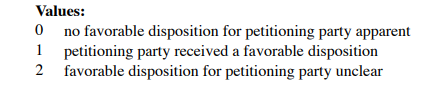

In [37]:
Y.value_counts()

1.0    51620
0.0    29036
Name: partyWinning, dtype: int64

In [38]:
Y.isna().sum()

0

- We have removed those records that did not have the final outcome

---

 ### 11. threeJudgeFdc
 - This is a binary variable
 - This variable will be checked if the case was heard by a three-judge federal district court (occasionally called “as specially constituted district court”).

In [39]:
xtrain.reset_index(inplace=True,drop=True)
xtest.reset_index(inplace=True,drop=True)
ytrain.reset_index(inplace=True,drop=True)
ytest.reset_index(inplace=True,drop=True)

In [40]:
xtrain.threeJudgeFdc.value_counts()

0.0    45331
1.0     2978
Name: threeJudgeFdc, dtype: int64

In [41]:
xtrain.threeJudgeFdc.isna().sum()

80

In [42]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,"threeJudgeFdc")

In [43]:
xtest = hot_deck_imputation_mode(xtest,ytest,"threeJudgeFdc")

In [44]:
xtrain.threeJudgeFdc.isna().sum()

0

In [45]:
xtest.threeJudgeFdc.isna().sum()

0

---

### 12. caseSource
- This variable identifies the court whose decision the Supreme Court reviewed. If the case originated in the same court whose decision the Supreme Court reviewed, the entry in the caseOrigin should be the same as here

In [46]:
xtrain.caseSource.isna().sum()

1082

In [47]:
xtrain["caseSource"].value_counts()

300.0    9117
29.0     5686
25.0     3618
22.0     3408
26.0     2665
         ... 
91.0        5
84.0        5
76.0        5
116.0       5
82.0        4
Name: caseSource, Length: 109, dtype: int64

In [48]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,"caseSource")

In [49]:
xtest = hot_deck_imputation_mode(xtest,ytest,"caseSource")

In [50]:
xtrain.caseSource.isna().sum(), xtest.caseSource.isna().sum()

(0, 0)

---


### 13. lcDisagreement
An entry in this variable indicates that the Supreme Court's majority opinion mentioned that
one or more of the members of the court whose decision the Supreme Court reviewed
dissented. The presence of such disagreement is limited to a statement to this effect
somewhere in the majority opinion. I.e, "divided," "dissented,"
"disagreed," "split." A reference, without more, to the "majority" or "plurality" does not
necessarily evidence dissent. The other judges may have concurred

In [51]:
xtrain.lcDisagreement.isna().sum(), xtest.lcDisagreement.isna().sum()

(46, 35)

In [52]:
xtrain.lcDisagreement.value_counts()

0.0    38085
1.0    10258
Name: lcDisagreement, dtype: int64

In [53]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,"lcDisagreement")
xtest = hot_deck_imputation_mode(xtest,ytest,"lcDisagreement")

In [54]:
xtrain.lcDisagreement.isna().sum(), xtest.lcDisagreement.isna().sum()

(0, 0)

---

### 14. 'certReason',
- This variable provides the reason, if any, that the Court gives for granting the petition for certiorari
- In law, certiorari is a court process to seek judicial review of a decision of a lower court or government agency

In [55]:
xtrain.certReason.isna().sum(), xtest.certReason.isna().sum()

(465, 299)

In [56]:
xtrain.certReason.value_counts()

12.0    17227
1.0      9317
2.0      6992
11.0     6982
10.0     4208
3.0      1004
4.0       689
5.0       555
13.0      440
6.0       215
7.0       198
9.0        70
8.0        27
Name: certReason, dtype: int64

In [57]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'certReason')
xtest = hot_deck_imputation_mode(xtest,ytest,'certReason')

In [58]:
xtrain.certReason.isna().sum(), xtest.certReason.isna().sum()

(0, 0)

---

### 15.        'lcDisposition', 

This variable specifies the treatment the court whose decision the Supreme Court reviewed
accorded the decision of the court it reviewed; e.g., whether the court below the Supreme
Court---typically a federal court of appeals or a state supreme court---affirmed, reversed,
remanded, etc. the decision of the court it reviewed---typically a trial court.


In [59]:
xtrain.lcDisposition.isna().sum(), xtest.lcDisposition.isna().sum()

(6704, 4370)

In [60]:
xtrain.lcDisposition.value_counts()

2.0     21975
3.0     10673
9.0      2481
4.0      2364
6.0       989
5.0       902
8.0       802
7.0       379
1.0       351
11.0      313
12.0      308
10.0      148
Name: lcDisposition, dtype: int64

In [61]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'lcDisposition')
xtest = hot_deck_imputation_mode(xtest,ytest,'lcDisposition')

In [62]:
xtrain.lcDisposition.isna().sum(), xtest.lcDisposition.isna().sum()

(0, 0)

<br>

### 16. 'lcDispositionDirection'
This variable specifies whether the decision of the court whose decision the Supreme Court
reviewed was itself liberal or conservative as these terms are defined in the direction of
decision variable (decisionDirection).


In [63]:
xtrain.lcDispositionDirection.value_counts()

1.0    26426
2.0    20411
3.0      526
Name: lcDispositionDirection, dtype: int64

In [64]:
xtrain.lcDispositionDirection.isna().sum(), xtest.lcDispositionDirection.isna().sum()

(1026, 678)

In [65]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'lcDispositionDirection')
xtest = hot_deck_imputation_mode(xtest,ytest,'lcDispositionDirection')

In [66]:
xtrain.lcDispositionDirection.isna().sum(), xtest.lcDispositionDirection.isna().sum()

(0, 0)

---

### 17. 'declarationUncon',
 

An entry in this variable indicates that the Court either declared unconstitutional an act of
Congress; a state or territorial statute, regulation, or constitutional provision; or a municipal
or other local ordinance

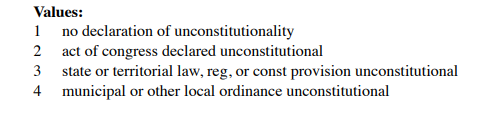

In [67]:
xtrain.declarationUncon.value_counts()

1.0    44845
3.0     2557
2.0      633
4.0      347
Name: declarationUncon, dtype: int64

In [68]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'declarationUncon')
xtest = hot_deck_imputation_mode(xtest,ytest,'declarationUncon')


In [69]:
xtrain.declarationUncon.isna().sum(), xtest.declarationUncon.isna().sum()

(0, 0)

---

### 18. 'caseDisposition'

The treatment the Supreme Court accorded the court whose decision it reviewed is
contained in this variable

In [70]:
xtrain.caseDisposition.isna().sum(), xtest.caseDisposition.isna().sum()

(704, 480)

In [71]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'caseDisposition')
xtest = hot_deck_imputation_mode(xtest,ytest,'caseDisposition')


In [72]:
xtrain.caseDisposition.isna().sum(), xtest.caseDisposition.isna().sum()

(0, 0)

---

 ### 19. caseDispositionUnusual

An entry (1) will appear in this variable to signify that the Court made an unusual
disposition of the cited case which does not match the coding scheme of the preceding
variable.

In [73]:
xtrain.caseDispositionUnusual.isna().sum(), xtest.caseDispositionUnusual.isna().sum()

(7, 2)

In [74]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'caseDispositionUnusual')
xtest = hot_deck_imputation_mode(xtest,ytest,'caseDispositionUnusual')

In [75]:
xtrain.caseDispositionUnusual.isna().sum(), xtest.caseDispositionUnusual.isna().sum()

(0, 0)

---

## 20. precedentAlteration
A "1" will appear in this variable if the majority opinion effectively says that the decision in
this case "overruled" one or more of the Court's own precedents

In [76]:
xtrain.precedentAlteration.isna().sum(), xtest.precedentAlteration.isna().sum()

(7, 2)

In [77]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'precedentAlteration')
xtest = hot_deck_imputation_mode(xtest,ytest,'precedentAlteration')

In [78]:
xtrain.precedentAlteration.isna().sum(), xtest.precedentAlteration.isna().sum()

(0, 0)

---

### 21.  voteUnclear
In the vast majority of cases, the individual justices clearly indicate whether or not they
agree with the disposition made by the majority. For a small number of cases clarity may be
lacking, as when a justice concurs in part and dissents in part.

In [79]:
xtrain.voteUnclear.isna().sum(), xtest.voteUnclear.isna().sum()

(11, 7)

In [80]:
xtrain.voteUnclear.value_counts()

0.0    47888
1.0      490
Name: voteUnclear, dtype: int64

In [81]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'voteUnclear')
xtest = hot_deck_imputation_mode(xtest,ytest,'voteUnclear')

In [82]:
xtrain.voteUnclear.isna().sum(), xtest.voteUnclear.isna().sum()

(0, 0)

---

### 22. issue
This variable identifies the issue for each decision. Although criteria for the identification of
issues are hard to articulate, the focus here is on the subject matter of the controversy (e.g.,
sex discrimination, state tax, affirmative action) rather than its legal basis (e.g., the equal
protection clause)

In [83]:
xtrain.issue.isna().sum(), xtest.issue.isna().sum()

(244, 151)

In [84]:
xtrain.issue.value_counts()

10050.0     1347
10020.0     1196
120010.0    1151
80010.0     1147
90120.0     1027
            ... 
90100.0        5
140070.0       5
20380.0        5
140030.0       4
140060.0       4
Name: issue, Length: 267, dtype: int64

In [85]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'issue')
xtest = hot_deck_imputation_mode(xtest,ytest,'issue')

In [86]:
xtrain.issue.isna().sum(), xtest.issue.isna().sum()

(0, 0)

---

### 23. 'issueArea'
      

This variable simply separates the issues identified in the preceding variable (issue) into the
following larger categories: 
1. criminal procedure (issues 10010-10600), 
2. civil rights (issues
3. 20010-20410), 
4. First Amendment (issues 30010-30020), 
5. due process (issues 40010-40070),
6. privacy (issues 50010-50040), 
7. attorneys' or governmental officials' fees or compensation (issues 60010-60040), 
8. unions (issues 70010-70210), 
9. economic activity (issues 80010-80350), judicial power (issues 90010-90520), 
10. federalism (issues 100010-100130),
11. interstate relation (issues 110010-110030), 
12. federal taxation (issues 120010-120040),
13. miscellaneous (issues 130010-130020), and 
14. private law (issues 140010-140080).


In [87]:
xtrain.issueArea.isna().sum(), xtest.issueArea.isna().sum()

(244, 151)

In [88]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'issueArea')
xtest = hot_deck_imputation_mode(xtest,ytest,'issueArea')

In [89]:
xtrain.issueArea.isna().sum(), xtest.issueArea.isna().sum()

(0, 0)

---

### 24. 'decisionDirection'
In order to determine whether the Court supports or opposes the issue to which the case
pertains, this variable codes the ideological "direction" of the decision.

In [90]:
xtrain.decisionDirection.isna().sum(), xtest.decisionDirection.isna().sum()

(119, 78)

In [91]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'decisionDirection')
xtest = hot_deck_imputation_mode(xtest,ytest,'decisionDirection')

In [92]:
xtrain.decisionDirection.isna().sum(), xtest.decisionDirection.isna().sum()

(0, 0)

---

### 25. 'decisionDirectionDissent'

Once in a great while the majority as well as the dissenting opinion in a case will both
support or, conversely, oppose the issue to which the case pertains

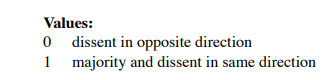

In [93]:
xtrain["decisionDirectionDissent"].value_counts()

0.0    47101
1.0      435
Name: decisionDirectionDissent, dtype: int64

In [94]:
xtrain.decisionDirectionDissent.isna().sum(), xtest.decisionDirectionDissent.isna().sum()

(853, 559)

In [95]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'decisionDirectionDissent')
xtest = hot_deck_imputation_mode(xtest,ytest,'decisionDirectionDissent')

In [96]:
xtrain.decisionDirectionDissent.isna().sum(), xtest.decisionDirectionDissent.isna().sum()

(0, 0)

---

### 26. authorityDecision1
This variable and the next one (authorityDecision2) specify the bases on which the Supreme
Court rested its decision with regard to each legal provision that the Court considered in the
case (

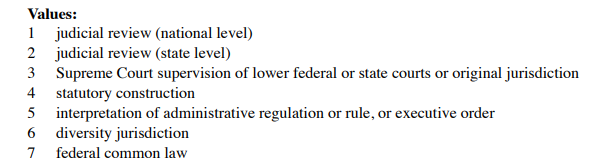

In [97]:
xtrain.authorityDecision1.value_counts()

4.0    20692
2.0    10951
3.0     6274
1.0     4182
7.0     3842
5.0     2147
6.0       91
Name: authorityDecision1, dtype: int64

In [98]:
xtrain.authorityDecision1.isna().sum(), xtest.authorityDecision1.isna().sum()

(210, 140)

In [99]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'authorityDecision1')
xtest = hot_deck_imputation_mode(xtest,ytest,'authorityDecision1')

In [100]:
xtrain.authorityDecision1.isna().sum(), xtest.authorityDecision1.isna().sum()

(0, 0)

---

### 27. lawType
This variable and its components (lawSupp and lawMinor) identify the constitutional
provision(s), statute(s), or court rule(s) that the Court considered in the case

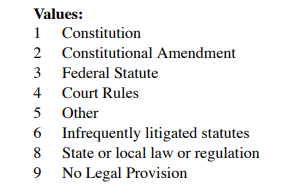

In [101]:
xtrain.lawType.isna().sum(), xtest.lawType.isna().sum()

(6665, 4424)

In [102]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'lawType')
xtest = hot_deck_imputation_mode(xtest,ytest,'lawType')

In [103]:
xtrain.lawType.isna().sum(), xtest.lawType.isna().sum()

(0, 0)

---

### 28. majVotes
This variable specifies the number of justices voting in the majority; minVotes indicates the
number of justices voting in dissent.

In [104]:
xtrain.majVotes.isna().sum(), xtest.majVotes.isna().sum()

(0, 0)

- There are no null values

---

### 29. minVotes

In [105]:
xtrain.minVotes.isna().sum(), xtest.minVotes.isna().sum()

(0, 0)

- There are no null values

---


### 30. vote
This variable provides information about each justice's vote in the case

Values:
1. voted with majority or plurality
2. dissent
3. regular concurrence

4. special concurrence
5. judgment of the Court
6. dissent from a denial or dismissal of certiorari , or dissent from summary affirmation of an appeal
7. jurisdictional dissent
8. justice participated in an equally divided vote

In [106]:
xtrain.vote.value_counts()

1.0    34052
2.0     8292
4.0     2173
3.0     1782
8.0      472
7.0      239
5.0      156
6.0       11
Name: vote, dtype: int64

In [107]:
xtrain.vote.isna().sum(), xtest.vote.isna().sum()

(1212, 779)

In [108]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'vote')
xtest = hot_deck_imputation_mode(xtest,ytest,'vote')

In [109]:
xtrain.vote.isna().sum(), xtest.vote.isna().sum()

(0, 0)

---

### 31. opinion
This variable indicates the opinion, if any, that the justice wrote. It appears in the Justice
Centered Datasets only.
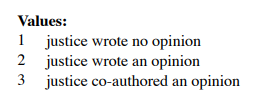

In [110]:
xtrain.opinion.isna().sum(), xtest.opinion.isna().sum()

(1216, 784)

In [111]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'opinion')
xtest = hot_deck_imputation_mode(xtest,ytest,'opinion')

In [112]:
xtrain.opinion.isna().sum(), xtest.opinion.isna().sum()

(0, 0)

---

## 32. direction
This variable indicates whether the justice cast a liberal or conservative vote.

Values:
1. conservative
2. liberal

In [113]:
xtrain.direction.isna().sum(), xtest.direction.isna().sum()

(2689, 1724)

In [114]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'direction')
xtest = hot_deck_imputation_mode(xtest,ytest,'direction')

In [115]:
xtrain.direction.isna().sum(), xtest.direction.isna().sum()

(0, 0)

### 33. majority

Analysts commonly want to know the frequency with which given justices vote with the
majority and/or in dissent overall or in certain sets of circumstances. This variable provides
that information for each justice

Values:
1. dissent
2. majority

In [116]:

xtrain.majority.isna().sum(), xtest.majority.isna().sum()

(1695, 1104)

In [117]:
xtrain.majority.value_counts()

2.0    38163
1.0     8531
Name: majority, dtype: int64

In [118]:
xtrain = hot_deck_imputation_mode(xtrain,ytrain,'majority')
xtest = hot_deck_imputation_mode(xtest,ytest,'majority')

In [119]:
xtrain.majority.isna().sum(), xtest.majority.isna().sum()

(0, 0)

In [120]:
remove = ["authorityDecision1","precedentAlteration","caseDispositionUnusual","caseDisposition","majority","voteUnclear","vote_id_num_of_Justices","duration_of_case","decisionType","decisionDirection","decisionDirectionDissent","majVotes", "minVotes", "vote", "opinion", "direction"]

In [121]:
xtrain1 = xtrain.drop(remove,axis=1)
xtest1 = xtest.drop(remove,axis=1)

In [122]:
xtrain1.columns

Index(['naturalCourt', 'jurisdiction', 'threeJudgeFdc', 'caseSource',
       'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'issue', 'issueArea',
       'lawType'],
      dtype='object')

In [123]:
xtrain1.shape

(48389, 12)

In [124]:
xtrain1.isna().sum()

naturalCourt              0
jurisdiction              0
threeJudgeFdc             0
caseSource                0
lcDisagreement            0
certReason                0
lcDisposition             0
lcDispositionDirection    0
declarationUncon          0
issue                     0
issueArea                 0
lawType                   0
dtype: int64

<BR>

<br>

---

## <font color=blue> 6. Multicollinearity </font>

### 6.1 VIF
- VIF may not be the ideal technique where the data is categorical nature.

In [125]:
vif1 = [vif(xtrain1.values, i) for i in range(xtrain1.shape[1])]
pd.DataFrame(vif1, index=xtrain1.columns, columns=['VIF'])

,VIF
naturalCourt,31.559056
jurisdiction,2.845209
threeJudgeFdc,1.228727
caseSource,2.067131
lcDisagreement,1.304170
certReason,4.598698
lcDisposition,3.214999
lcDispositionDirection,9.367131
declarationUncon,6.283681
issue,129.720842


<br>

### 6.2 Cramér's V Test for association between Nominal Variables

- In statistics, Cramér's V (sometimes referred to as Cramér's phi and denoted as φc) is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946

- Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)

**Check for Multicollinearity**

In [126]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def matrix_cramersV(cols,y):
    matrix = dict.fromkeys(xtrain1.columns,[])
    for i in cols:
        for j in cols:
            value = cramers_v(xtrain[i],xtrain[j])
            c = matrix[i]+[value]
            matrix[i]=c
    return matrix



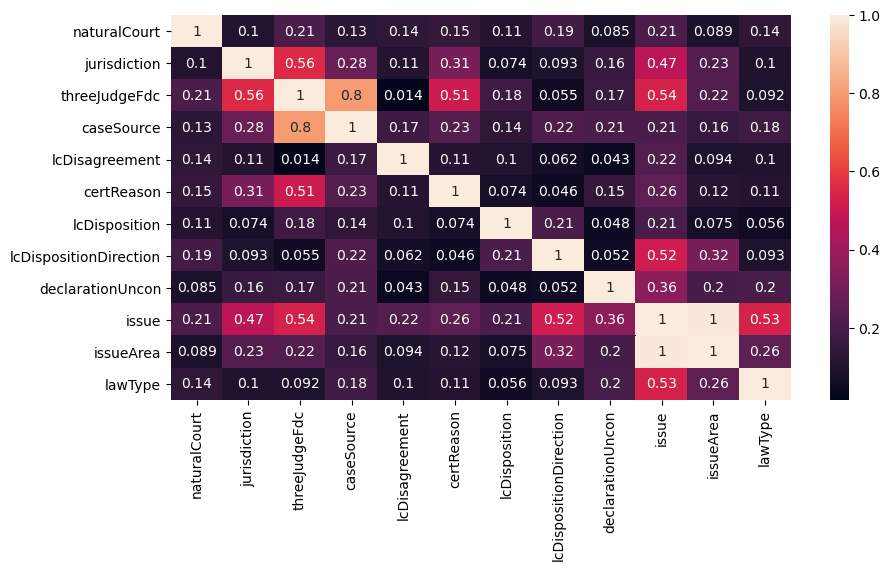

In [127]:
plt.figure(figsize=(10,5))
coll_matrix = pd.DataFrame(matrix_cramersV(list(xtrain1.columns),ytrain),index = xtrain1.columns)
sns.heatmap(coll_matrix,annot=True)
plt.show()

- Here issue is subcategory to issueArea, hence the Cramers'V value is high. Hence we remove issue.


<br>

---

## <font color=blue>7. Final List of Features </font>
- Certain features may not be available to the business / Law firm.
- An example would be "duration_of_case" and "decisionType".
- Information such as duration of a case is available only after the case has been closed. Hence a law firm may not have access to such information.
- Such features are removed.
- The data set also includes multiple target variables such as "decisionType". They are removed as well.

In [128]:
remove = ["issue","authorityDecision1","precedentAlteration","caseDispositionUnusual","caseDisposition","majority","voteUnclear","vote_id_num_of_Justices","duration_of_case","decisionType","decisionDirection","decisionDirectionDissent","majVotes", "minVotes", "vote", "opinion", "direction"]

In [129]:
xtrain1 = xtrain.drop(remove,axis=1)
xtest1 = xtest.drop(remove,axis=1)

<br>

---

## <font color=blue>8. EDA : Visualization</font>
This section involves both Univarite and Bivariate Analysis for predictor and target variables

In [130]:
def visual(df,col1,target1):
    
    plt.figure(figsize=(17,5))
    plt.subplot(1,2,1)
    plt.grid()
    sns.countplot(data=df,x=col1)
    title= "Countplot for "+col1
    plt.title(title)
#-----------------------------------------------------------    

    plt.subplot(1,2,2)
    plt.grid()
    sns.countplot(data=df,x=col1,hue=target1)
    title2 = "Bivariate plot with target Variable - partyWinning"
    plt.title(title2)
    plt.legend(title="partyWinning",loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
    
#----------------------------------------------------------------

def pie_plot(df,col1,autopct=False):
    if autopct==False:
    
        x = df[col1].value_counts()
        #plt.pie(xtrain1.lcDisagreement.value_counts(),labels=xtrain1.lcDisagreement.value_counts().index,autopct="%1.2f%%")
        patches, texts = plt.pie(x)
        plt.legend(patches, x.index, bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="upper center")
    else:
        x = df[col1].value_counts()
        #plt.pie(xtrain1.lcDisagreement.value_counts(),labels=xtrain1.lcDisagreement.value_counts().index,autopct="%1.2f%%")
        patches = plt.pie(x,autopct="%1.2f%%")
        plt.legend(patches, labels=x.index, bbox_to_anchor=(-0.1, 1.),fontsize=8,loc="upper center")        

    
    

    



<br>

### 1. jurisdiction

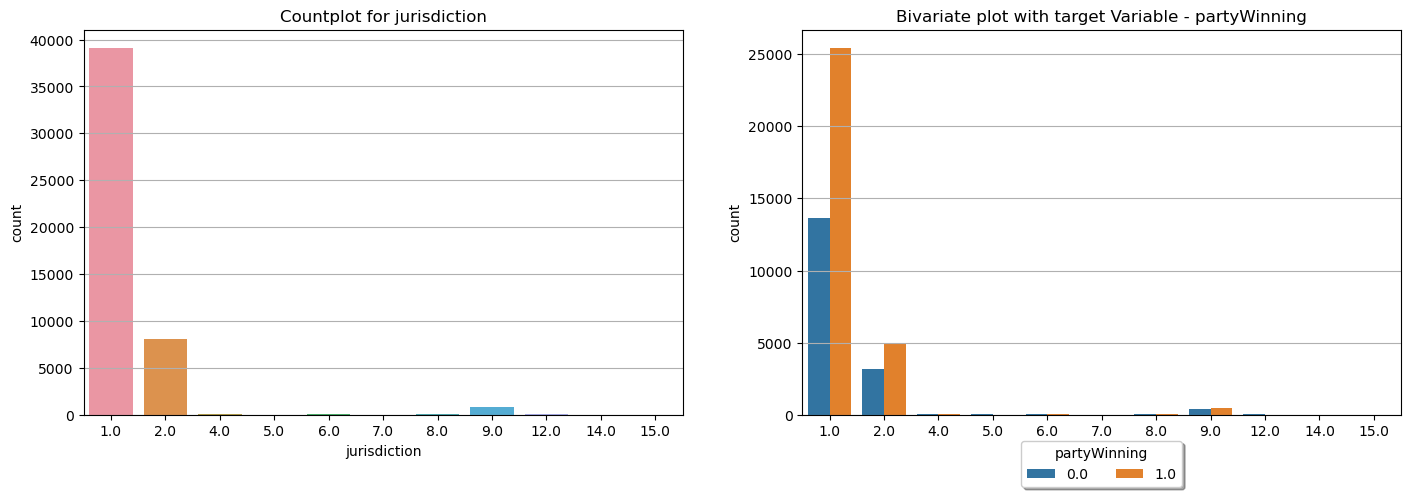

In [131]:
visual(xtrain1,"jurisdiction",ytrain)


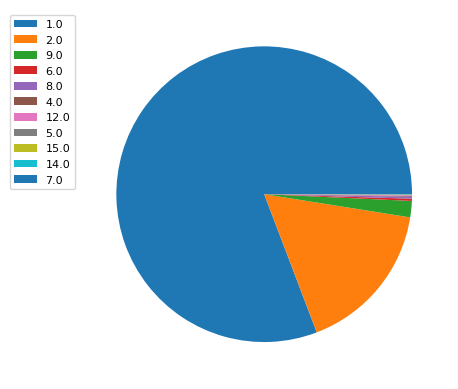

In [132]:
pie_plot(xtrain1,"jurisdiction")

Countplot of jurisdiction shows that highest number of cases for review pertains to Cert while 2nd hightst number of cases relates to appeal and reamining sets of cases are negligible.

Bivariate plot for cert and appeal depicts that favourable disposition received by patitioning party is more compare to non favourable disposition.

<br>

### 2. threeJudgeFdc

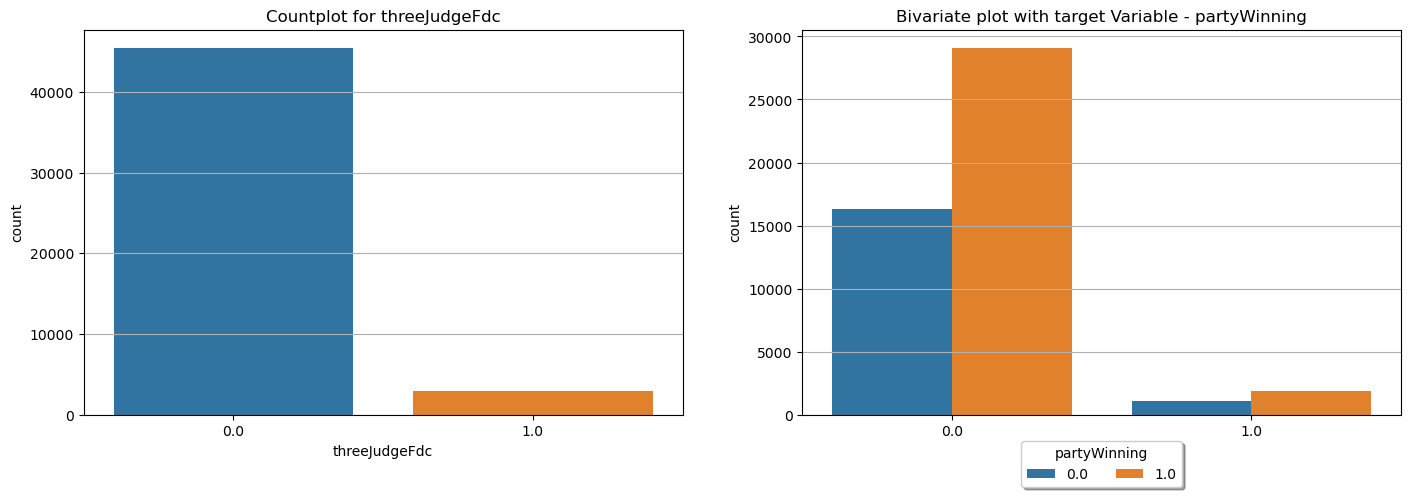

In [133]:
visual(xtrain1,"threeJudgeFdc",ytrain)

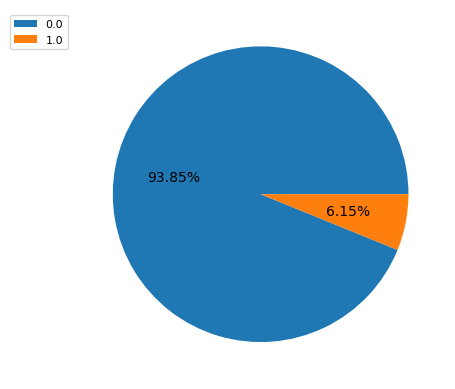

In [134]:
pie_plot(xtrain1,"threeJudgeFdc",True)

Countplot for threeJudgeFdc, shows that few number of cases heard by 3 judge dictrict court.

It is clear from the bivariate plot that the majority of decisions are in favour of petitining party, out of which few number of cases are heard by 3 judge drictrict court. 

<br>

### 3. lcDisagreement

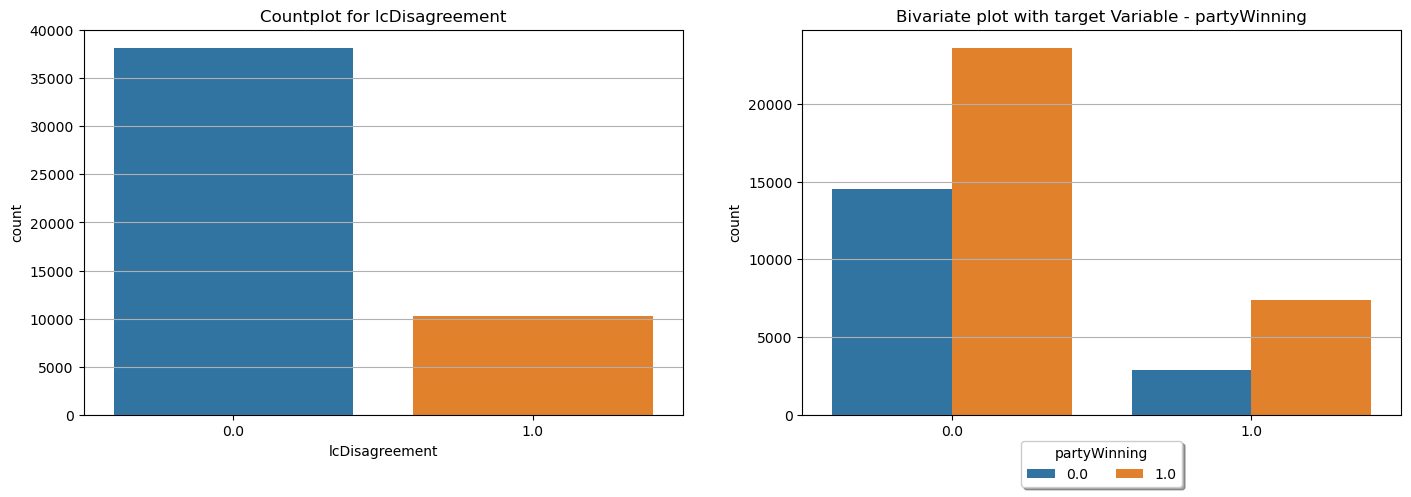

In [135]:
visual(xtrain1,"lcDisagreement",ytrain)

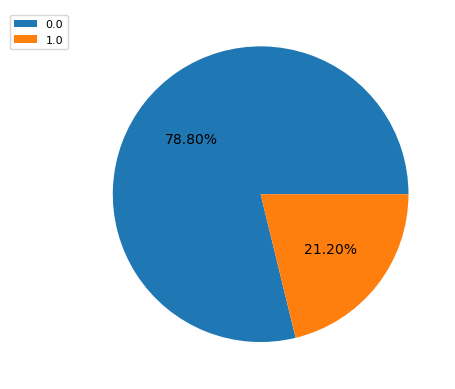

In [136]:
pie_plot(xtrain1,"lcDisagreement",True)

Countplot for Lower court Disagreement shows that majority of cases where dissent did not occured, however there are few cases dissented and also reviewed by supreme court.

Bivariate plot shows that majority of the cases where dissent did not occured are in favour of petitioning party. In addition, majority of the cases which are dissented by lower court and further reviewed by supereme court are in favour of patitioning party.

<br>

### 4. certReason

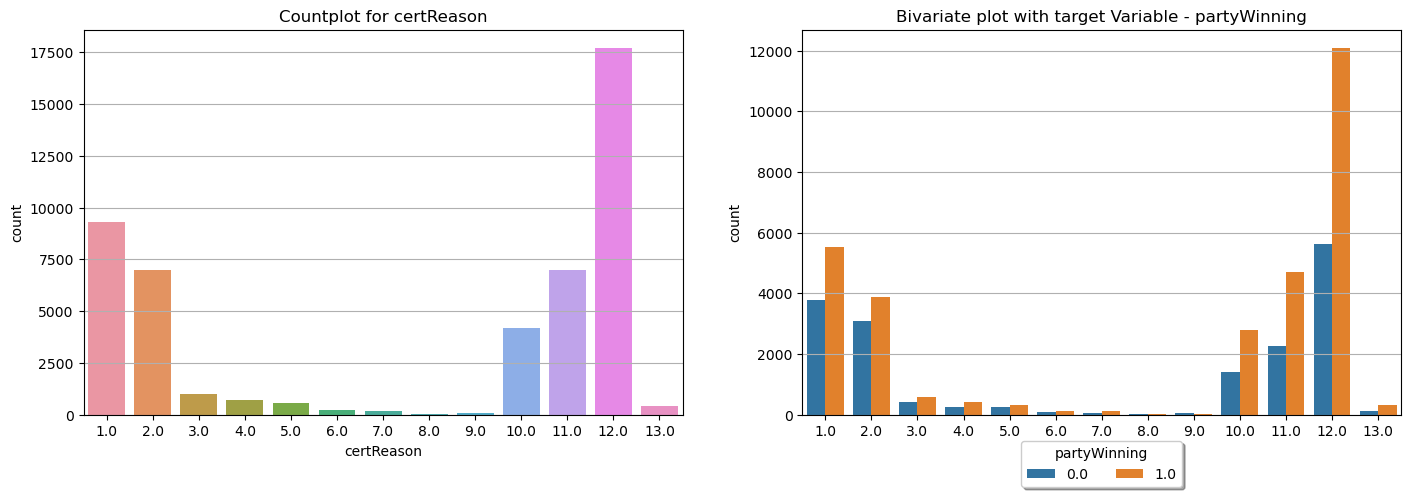

In [137]:
visual(xtrain1,"certReason",ytrain)

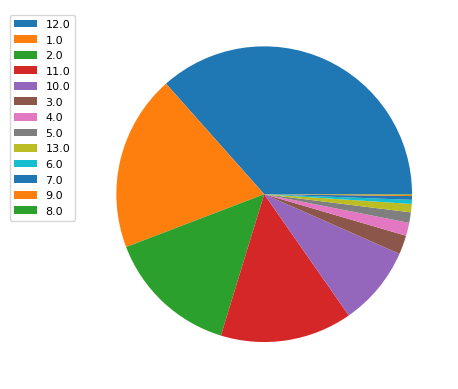

In [138]:
pie_plot(xtrain1,"certReason")

Countplot for certReason shows that highest number of count which is Court did not provides a reason why it agreed to hear the case. 
while few resons which is case did not arise on cert or cert not granted,federal court conflict,to resolve important or significant question,to resolve question presented like mejor the court given this kind of resons.


Bivariate plot shows that mejority of cases where no reson given by court are in favour of petitioning party.in addition,resons which is case did not arise on cert or cert not granted,federal court conflict,to resolve important or significant question,to resolve question presented also mejority are in favour of petitioning party.

<br>

### 5. lcDisposition

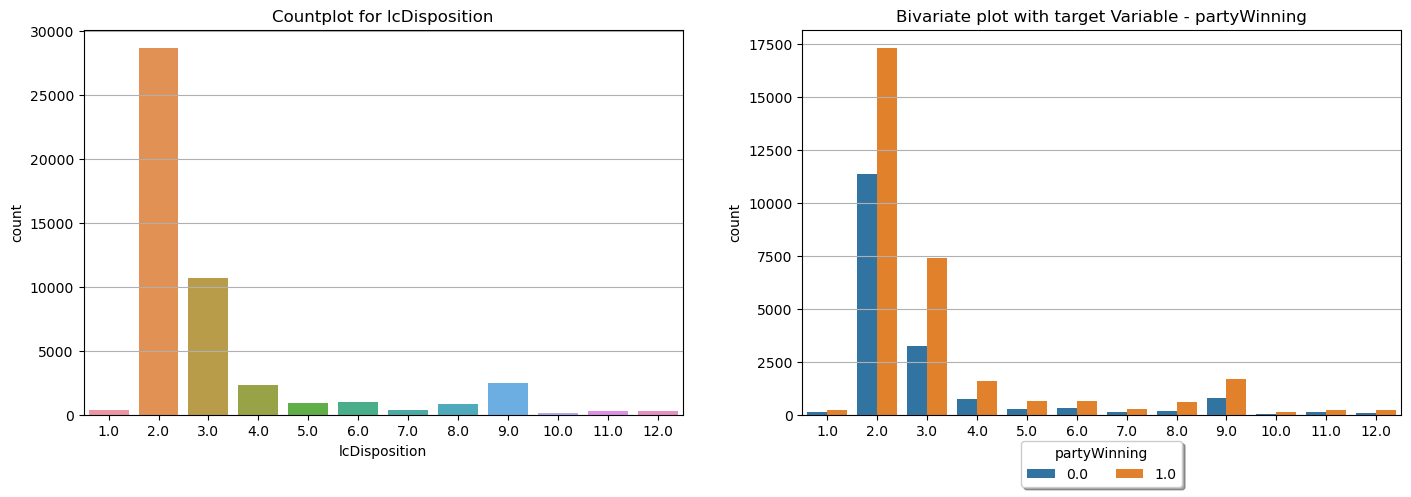

In [139]:
visual(xtrain1,"lcDisposition",ytrain)

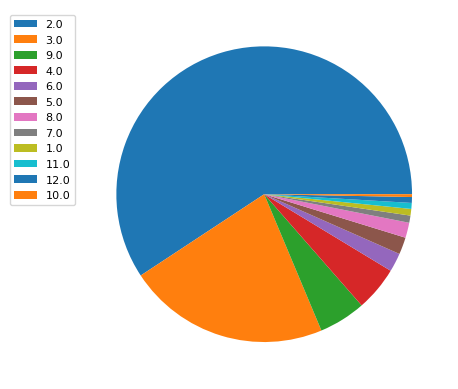

In [140]:
pie_plot(xtrain1,"lcDisposition")

Countplot for lcDisposition shows that, affirmed, reversed, reversed and remanded, as well as petition denied or appeal dismissed whose decision has been reviewed and accorded by supreme court.

Bivariate plot shows that, mejority of lcdisposition like affirmed, reversed, reversed and remanded, petition denied or appeal dismissed are in favour of petitioning party.

<br>

### 6. lcDispositionDirection

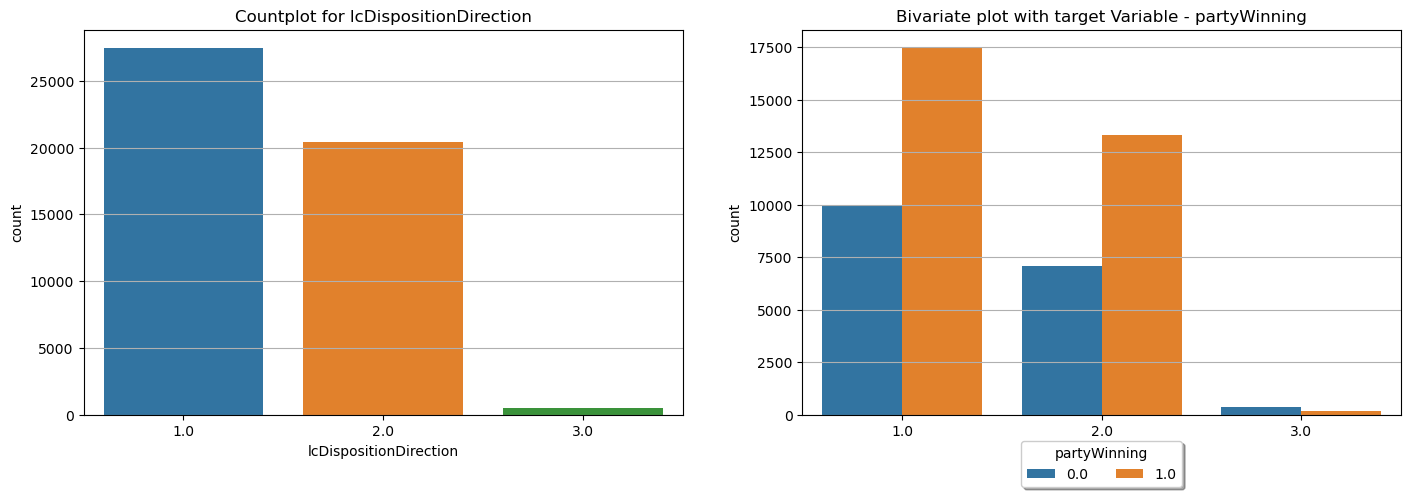

In [141]:
visual(xtrain1,"lcDispositionDirection",ytrain)

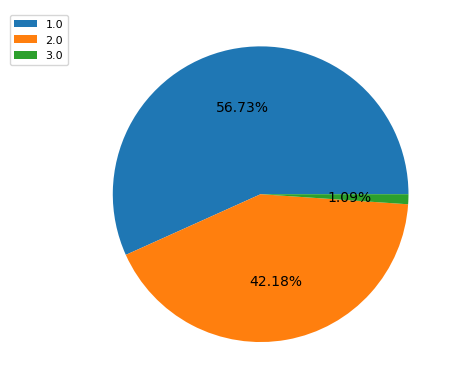

In [142]:
pie_plot(xtrain1,"lcDispositionDirection",True)

Countplot for lcDispositionDirection shows that, large number of cases whose decision reviewed by Supreme Court
is conservative as compare to liberal.

Bivariate plot shows that, liberal decisions reviewed by supreme court are largly in favour of petitioning party.

<br>

### 7. declarationUncon

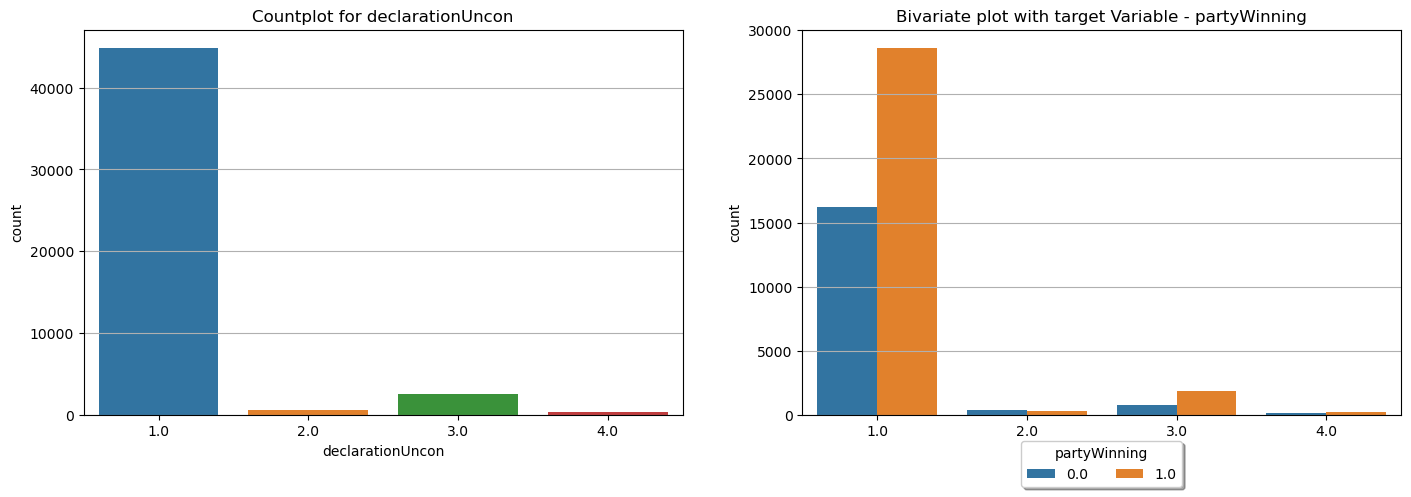

In [143]:
visual(xtrain1,"declarationUncon",ytrain)

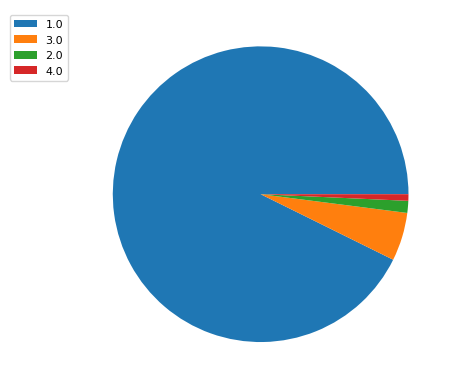

In [144]:
pie_plot(xtrain1,"declarationUncon")

Count plot for declarationUncon shows that, mejority of cases declared by court are considered as constitutional acts, while few acts such as state or territorial statute, regulation, or constitutional provision are considered unconstitutional.

Bivariate plot shows that mejority of the cases are in favour of petitioning party, where the constitutionality has been acknowledged.

<br>

### 8. issueArea

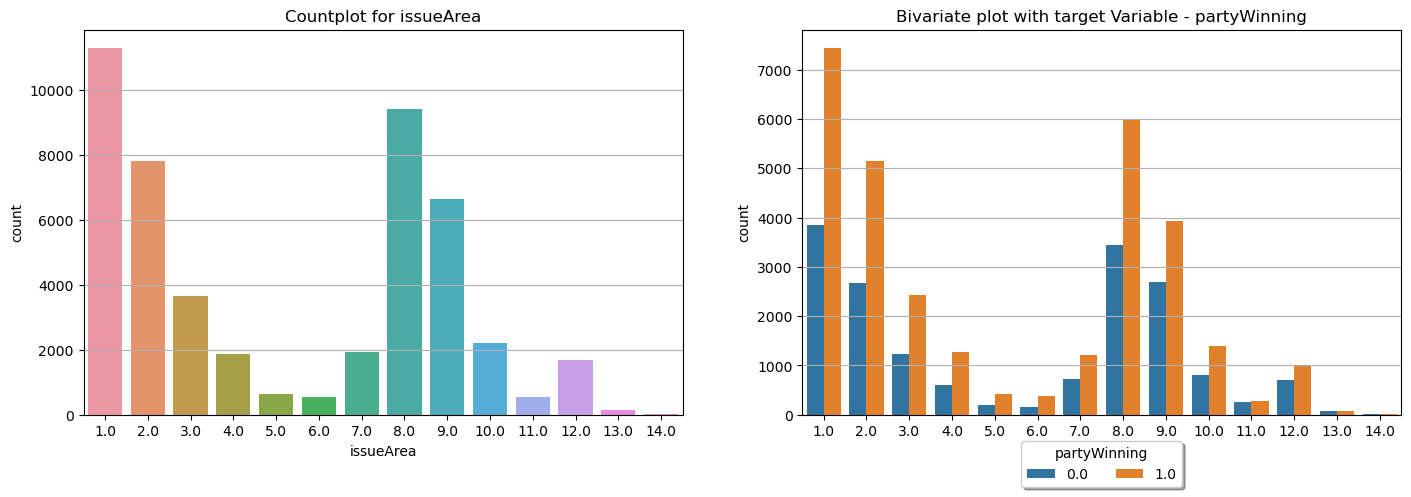

In [145]:
visual(xtrain1,"issueArea",ytrain)

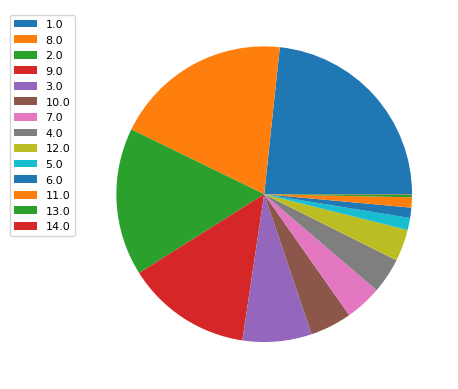

In [146]:
pie_plot(xtrain1,"issueArea")

CountPlot for issueArea shows that, high number of cases comes from Criminal Procedure, Civil Rights,First Amendment, Due Process,Economic Activity, Judicial Power, and Federalism.

Bivariate plot shows that, mejority of the decisions are in favour of petitioning party where the cases fall under the categories such as Criminal Procedure, Civil Rights, First Amendment, Due Process, Economic Activity, Judicial Power, Federalism.

<br>

### 9. lawType

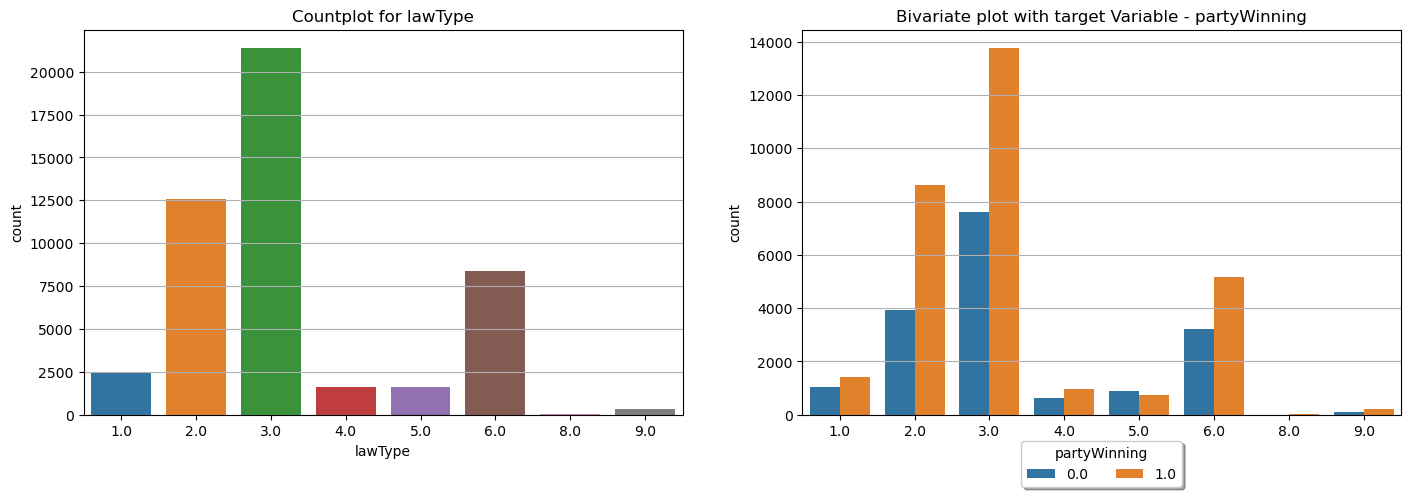

In [147]:
visual(xtrain1,"lawType",ytrain)

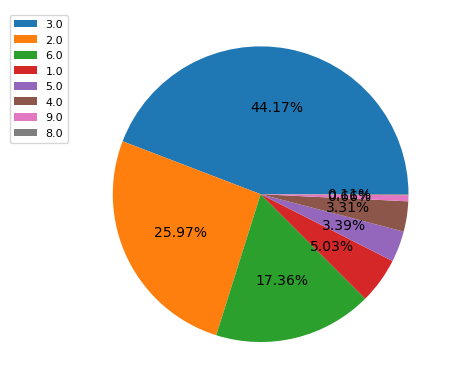

In [148]:
pie_plot(xtrain1,"lawType",True)

Count plot for lawtype shows that, the law types considered by court are selected from Constitutional Amendment, Federal Statute, Infrequently litigated statutes.

Bivariate plot shows that, majority of the decision are in favour of petitioning party in the law areas selected from Constitutional Amendment,Federal Statute,Infrequently litigated statutes.

<br>

### 10. naturalCourt

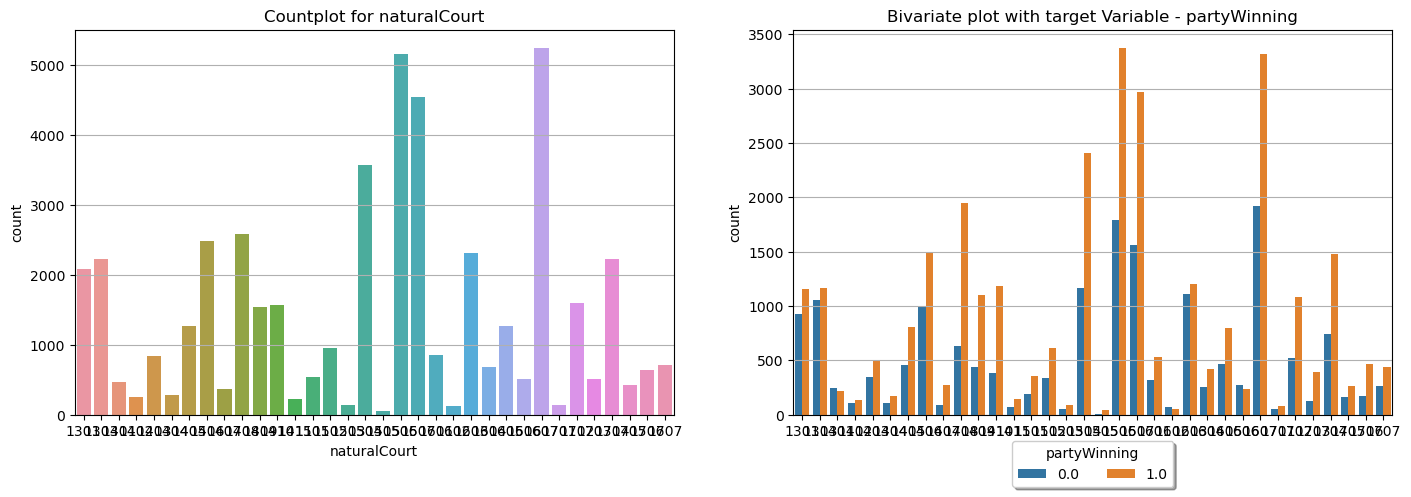

In [149]:
visual(xtrain1,"naturalCourt",ytrain)

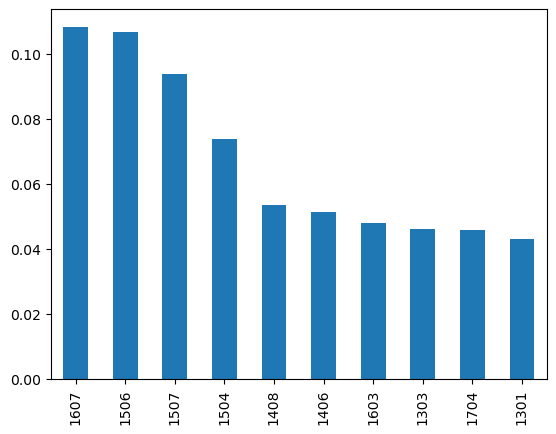

In [150]:
xtrain.naturalCourt.value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind="bar")
plt.show()

<br>
<br>

---

## Duration of Case VS Winning Party

<AxesSubplot:xlabel='Target', ylabel='Duration'>

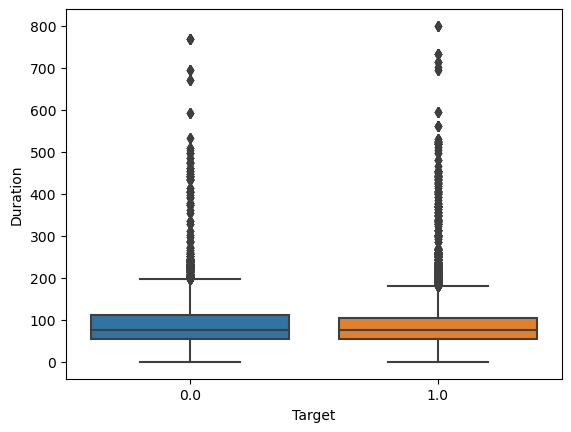

In [151]:
a = ytrain
b = xtrain.duration_of_case
df = pd.DataFrame({"Target":a,"Duration":b})
sns.boxplot(data=df,x="Target",y="Duration")

<br>

**Hypothesis Test**

In [152]:
from scipy.stats import ttest_ind,mannwhitneyu,shapiro
s1 = b[a==0]
s2 = b[a==1]
shapiro(s1),shapiro(s2)

(ShapiroResult(statistic=0.7599939703941345, pvalue=0.0),
 ShapiroResult(statistic=0.7257602214813232, pvalue=0.0))

- Shapiro results indicate that our samples are not normal. ( they dont come from a normal distribution )
- Hnece we use a two sample test for independant non parametric data : mannwhitneyu Test

- H0: time taken for a case does not play an important role in determining a favourable outcome for the winning party.
- H1 : time taken for a case plays an important role in determining a favourable outcome for the winning party.

In [153]:
mannwhitneyu(s1,s2)

MannwhitneyuResult(statistic=269417651.5, pvalue=0.3746098132740714)

Pvalue is >0.05. Hence the Null Hypothesis is accepted.

<br>


## <font color=blue>9. Statistical Tests for data</font>

### 8.1 Chi square test to determine statistical significance

- Pearson correlation cannot be used for nominal data. Hence we use chi square test.
- Select K Best is used to perform a chi_square test for all predictor variables.
- A chi_square test is performed between each predictor variable and the target variable. The pvalues and the corresponding columns are converted into a dataframe for reference.

In [154]:
SKB = SelectKBest(chi2, k=11)
SKB.fit(xtrain1, ytrain)


SelectKBest(k=11, score_func=<function chi2 at 0x000002315512C510>)

In [155]:
SKB.pvalues_

array([6.05543123e-34, 1.89239513e-32, 2.00131594e-01, 1.66702823e-02,
       2.65905513e-60, 0.00000000e+00, 1.50151172e-55, 6.05298966e-01,
       2.55967386e-02, 2.39874574e-72, 3.21227681e-14])

In [156]:
chi2_pval = pd.DataFrame({"predictor variables":xtrain1.columns, "pvalues":SKB.pvalues_}).sort_values("pvalues",ascending=True).reset_index(drop=True)
cm = sns.light_palette("green", as_cmap=True) 
chi2_pval.style.background_gradient(cmap=cm).set_precision(2)

,predictor variables,pvalues
0,certReason,0.00
1,issueArea,0.00
2,lcDisagreement,0.00
3,lcDisposition,0.00
4,naturalCourt,0.00
5,jurisdiction,0.00
6,lawType,0.00
7,caseSource,0.02
8,declarationUncon,0.03
9,threeJudgeFdc,0.20


In [157]:
xtrain1.drop(["threeJudgeFdc","lcDispositionDirection"],axis=1,inplace=True)
xtest1.drop(["threeJudgeFdc","lcDispositionDirection"],axis=1,inplace=True)

<br>

### 8.2 Representation of Train and Test of original data

- **Null Hypothesis H0**: Ytrain and Ytest are representative of the original data
- **Alternate Hypothesis H1** : Ytrain and Ytest are NOT representative of the original data

**ytrain**

In [158]:
stats.ttest_ind(Y,ytrain)

Ttest_indResult(statistic=0.165124643461543, pvalue=0.868846135231226)


**ytest**

In [159]:
stats.ttest_ind(Y,ytest)

Ttest_indResult(statistic=-0.1844814667254029, pvalue=0.8536360963531522)

**Inference**
1. Both Ytrain and Ytest have pvalues greater than 0.05.
2. Hence the Null Hypothesis (H0) is accepted.
3. This indicates that the ytrain and ytest are representative of the original data

<br>

---

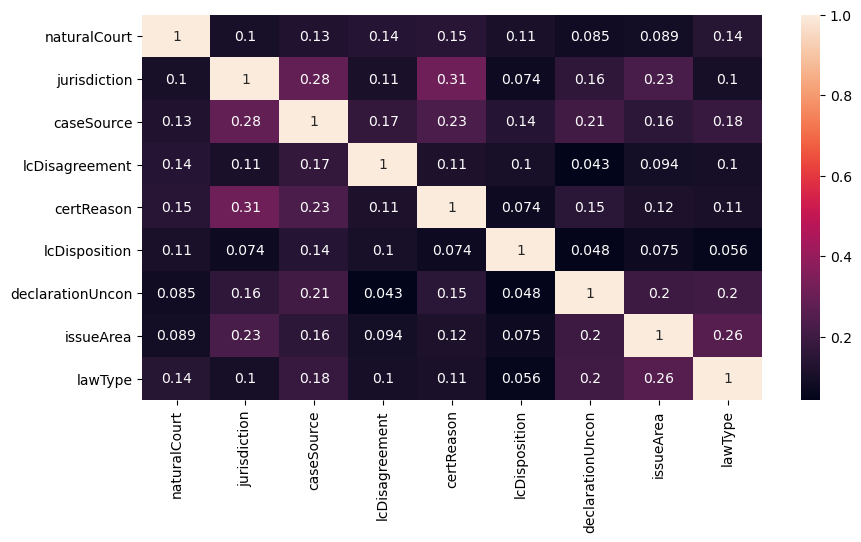

In [160]:
plt.figure(figsize=(10,5))
coll_matrix = pd.DataFrame(matrix_cramersV(list(xtrain1.columns),ytrain),index = xtrain1.columns)
sns.heatmap(coll_matrix,annot=True)
plt.show()

## <font color=blue>9. Model Building </font>


### 9.1 Logistic Regression


In [161]:
clf_lr= LogisticRegression(random_state=4)
clf_lr.fit(xtrain1,ytrain)
roc_auc_score(ytest,clf_lr.predict_proba(xtest1)[:,-1])

0.5934092034400962

In [162]:
clf_lr.score(xtest1,ytest)

0.636245272490545

In [163]:
print(classification_report(ytest,clf_lr.predict(xtest1)))

              precision    recall  f1-score   support

         0.0       0.39      0.02      0.04     11594
         1.0       0.64      0.98      0.78     20664

    accuracy                           0.64     32258
   macro avg       0.52      0.50      0.41     32258
weighted avg       0.55      0.64      0.51     32258



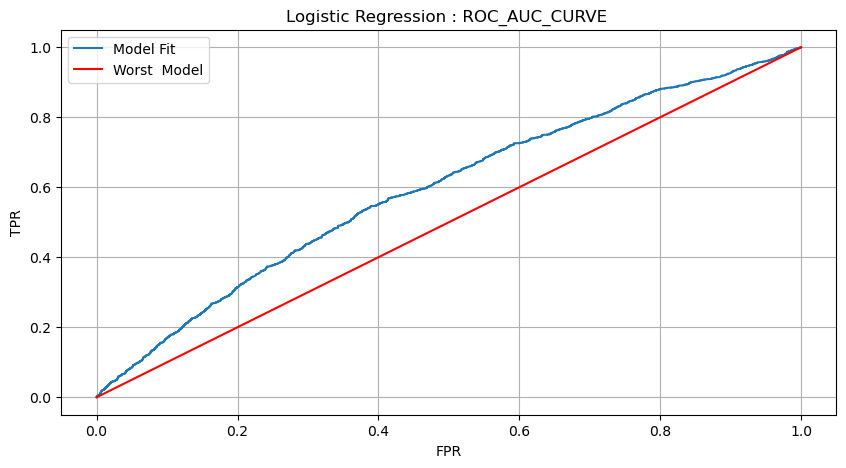

In [164]:
fpr, tpr, thresholds = roc_curve(ytest,clf_lr.predict_proba(xtest1)[:,-1])
thresholds[0] = thresholds[0]-1
fig,ax =plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr,label="Model Fit")
ax.plot(fpr,fpr,color='r',label="Worst  Model")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")


# ax1 = ax.twinx()

# ax1.plot(fpr,thresholds,color="g")
# ax1.set_ylabel("thresholds")
plt.title("Logistic Regression : ROC_AUC_CURVE ")
plt.grid()
plt.legend()

<br>

### 9.2 Decision Trees

In [165]:
clf_dt= DecisionTreeClassifier(random_state=4,max_depth=14)
clf_dt.fit(xtrain1,ytrain)
roc_auc_score(ytest,clf_dt.predict_proba(xtest1)[:,-1])

0.8890597410912007

In [166]:
clf_dt.score(xtest1,ytest)

0.8081716163432326

In [167]:
print(classification_report(ytest,clf_dt.predict(xtest1)))

              precision    recall  f1-score   support

         0.0       0.79      0.64      0.71     11594
         1.0       0.82      0.90      0.86     20664

    accuracy                           0.81     32258
   macro avg       0.80      0.77      0.78     32258
weighted avg       0.81      0.81      0.80     32258



In [168]:
print(confusion_matrix(ytest,clf_dt.predict(xtest1)))

[[ 7412  4182]
 [ 2006 18658]]


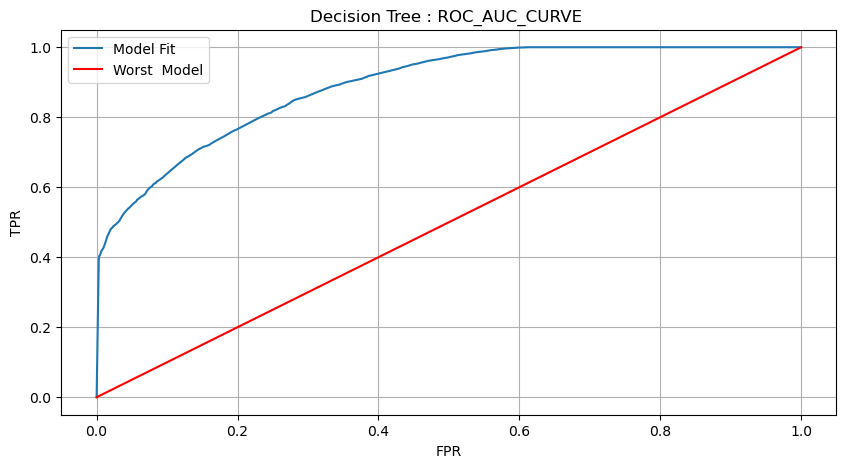

In [169]:
fpr, tpr, thresholds = roc_curve(ytest,clf_dt.predict_proba(xtest1)[:,-1])
thresholds[0] = thresholds[0]-1
fig,ax =plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr,label="Model Fit")
ax.plot(fpr,fpr,color='r',label="Worst  Model")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")


# ax1 = ax.twinx()

# ax1.plot(fpr,thresholds,color="g")
# ax1.set_ylabel("thresholds")
plt.title("Decision Tree : ROC_AUC_CURVE ")
plt.grid()
plt.legend()

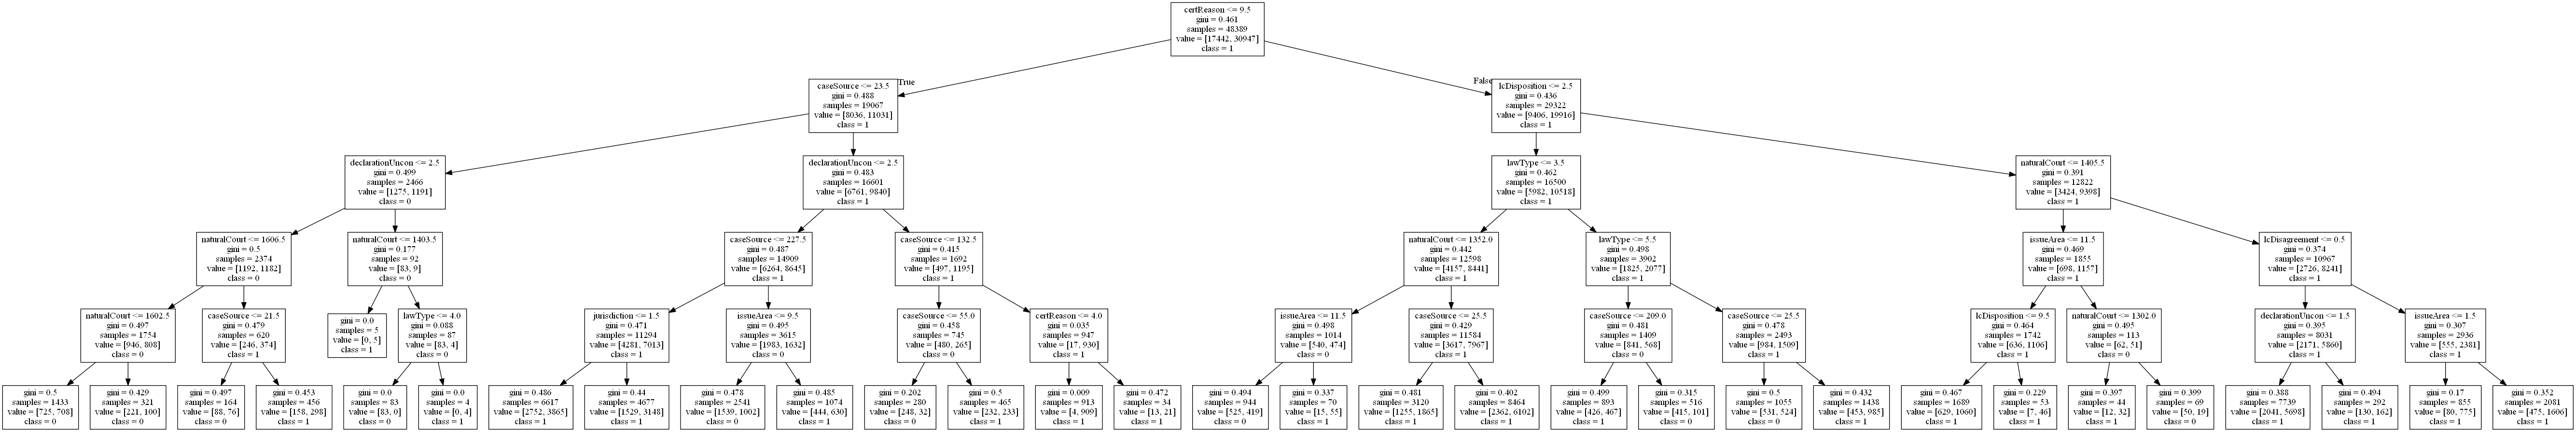

In [170]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
clf_dt= DecisionTreeClassifier(random_state=4,max_depth=5)
clf_dt.fit(xtrain1,ytrain)
features = xtrain1.columns
class_names = ["0","1"]
# Create DOT data
dot_data = export_graphviz(clf_dt, out_file=None, feature_names=features,class_names=class_names)
# classnames takes only a list where each element is a string

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [171]:
ytrain.value_counts()

1.0    30947
0.0    17442
Name: partyWinning, dtype: int64

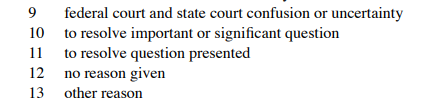

In [172]:
[str(i) for i in ytrain.unique()]

['1.0', '0.0']

<br>

### 9.3 AdaBoost 

In [173]:
clf_ada= AdaBoostClassifier(random_state=4)
clf_ada.fit(xtrain1,ytrain)
roc_auc_score(ytest,clf_ada.predict_proba(xtest1)[:,-1])

0.6431933459314632

In [174]:
clf_ada.score(xtest1,ytest)

0.6546903093806188

In [175]:
print(classification_report(ytest,clf_ada.predict(xtest1)))

              precision    recall  f1-score   support

         0.0       0.56      0.17      0.27     11594
         1.0       0.67      0.92      0.77     20664

    accuracy                           0.65     32258
   macro avg       0.61      0.55      0.52     32258
weighted avg       0.63      0.65      0.59     32258



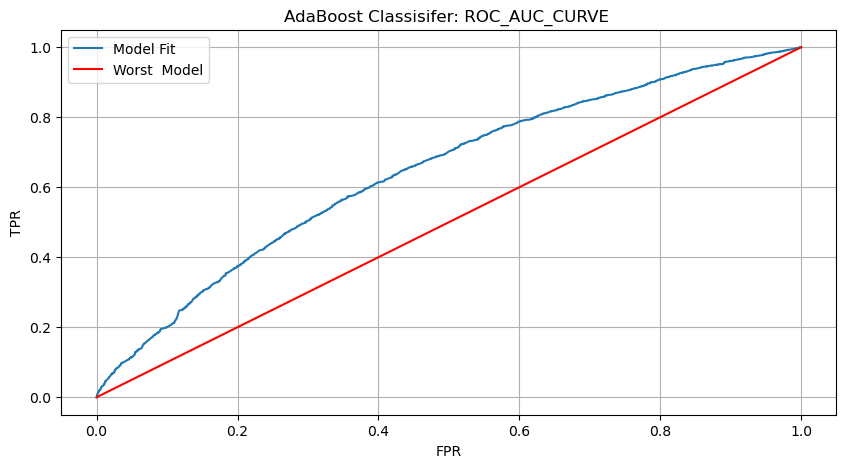

In [176]:
fpr, tpr, thresholds = roc_curve(ytest,clf_ada.predict_proba(xtest1)[:,-1])
thresholds[0] = thresholds[0]-1
fig,ax =plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr,label="Model Fit")
ax.plot(fpr,fpr,color='r',label="Worst  Model")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")


# ax1 = ax.twinx()

# ax1.plot(fpr,thresholds,color="g")
# ax1.set_ylabel("thresholds")
plt.title("AdaBoost Classisifer: ROC_AUC_CURVE ")
plt.grid()
plt.legend()

<br>

### 9.2 RandomForest

In [177]:
clf_final = RandomForestClassifier(random_state=4,n_estimators=200,max_depth=14)
clf_final.fit(xtrain1,ytrain)
roc_auc_score(ytest,clf_final.predict_proba(xtest1)[:,-1])

0.9522845789246724

In [178]:
clf_final.score(xtest1,ytest)

0.8675987351974704

In [179]:
confusion_matrix(ytest,clf_final.predict(xtest1))

array([[ 7808,  3786],
       [  485, 20179]], dtype=int64)

In [180]:
print(classification_report(ytest,clf_final.predict(xtest1)))

              precision    recall  f1-score   support

         0.0       0.94      0.67      0.79     11594
         1.0       0.84      0.98      0.90     20664

    accuracy                           0.87     32258
   macro avg       0.89      0.82      0.84     32258
weighted avg       0.88      0.87      0.86     32258



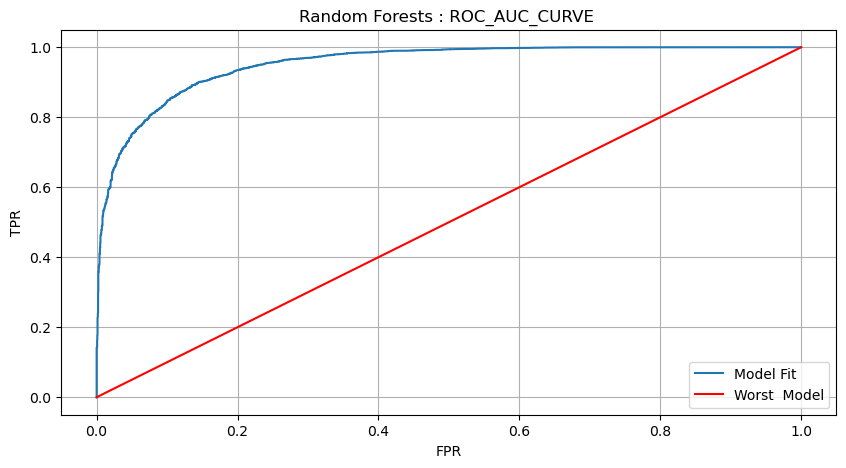

In [181]:
fpr, tpr, thresholds = roc_curve(ytest,clf_final.predict_proba(xtest1)[:,-1])
thresholds[0] = thresholds[0]-1
fig,ax =plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr,label="Model Fit")
ax.plot(fpr,fpr,color='r',label="Worst  Model")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")



# ax1 = ax.twinx()

# ax1.plot(fpr,thresholds,color="g")
# ax1.set_ylabel("thresholds")
plt.title("Random Forests : ROC_AUC_CURVE ")
plt.grid()
plt.legend()

In [182]:
a=pd.DataFrame({"col":xtrain1.columns,"fimp":clf_final.feature_importances_}).sort_values("fimp",ascending=False).reset_index(drop=True)
a.style.background_gradient(cmap=cm).set_precision(2)

,col,fimp
0,naturalCourt,0.23
1,caseSource,0.22
2,issueArea,0.15
3,lawType,0.11
4,certReason,0.11
5,lcDisposition,0.08
6,declarationUncon,0.05
7,lcDisagreement,0.03
8,jurisdiction,0.02


Text(0, 0.5, 'Independant Features')

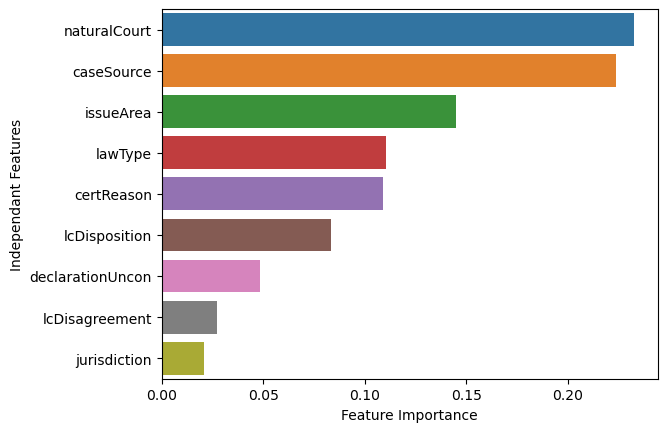

In [183]:
sns.barplot(y=a["col"],x=a["fimp"],orient="h")
plt.xlabel("Feature Importance")
plt.ylabel("Independant Features")

<br>


### 9.3 Gradient Boosting Classifier

#### 9.3.1 Before Tuning

In [184]:
clf_final = GradientBoostingClassifier(n_estimators=500,random_state=4)
clf_final.fit(xtrain1,ytrain)
roc_auc_score(ytest,clf_final.predict_proba(xtest1)[:,-1])

0.7512758849695376

In [185]:
clf_final.score(xtest1,ytest)

0.7135594271188542

In [186]:
confusion_matrix(ytest,clf_final.predict(xtest1))

array([[ 4222,  7372],
       [ 1868, 18796]], dtype=int64)

In [187]:
print(classification_report(ytest,clf_final.predict(xtest1)))

              precision    recall  f1-score   support

         0.0       0.69      0.36      0.48     11594
         1.0       0.72      0.91      0.80     20664

    accuracy                           0.71     32258
   macro avg       0.71      0.64      0.64     32258
weighted avg       0.71      0.71      0.69     32258



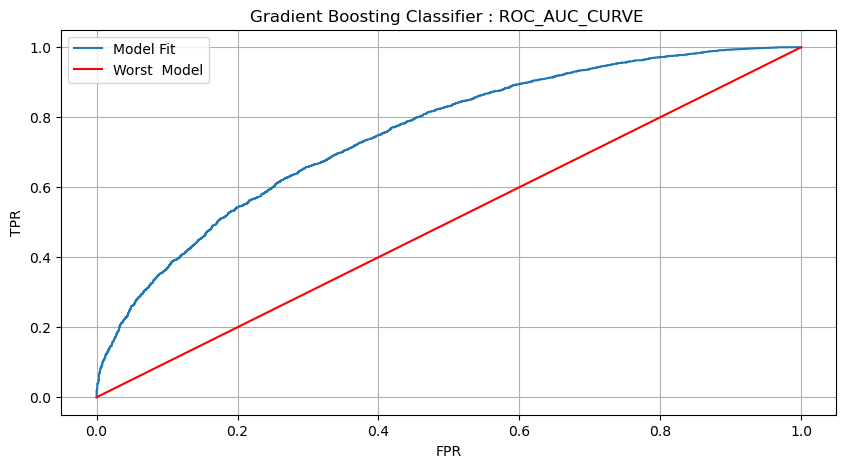

In [188]:
fpr, tpr, thresholds = roc_curve(ytest,clf_final.predict_proba(xtest1)[:,-1])
thresholds[0] = thresholds[0]-1
fig,ax =plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr,label="Model Fit")
ax.plot(fpr,fpr,color='r',label="Worst  Model")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")


# ax1 = ax.twinx()

# ax1.plot(fpr,thresholds,color="g")
# ax1.set_ylabel("thresholds")
plt.title("Gradient Boosting Classifier : ROC_AUC_CURVE ")
plt.grid()

plt.legend()

In [189]:
pd.DataFrame({"fimp":clf_final.feature_importances_,"col":xtrain1.columns}).sort_values("fimp",ascending=False)


,fimp,col
2,0.200268,caseSource
0,0.188271,naturalCourt
6,0.145559,declarationUncon
7,0.119417,issueArea
4,0.099994,certReason
8,0.092755,lawType
5,0.083101,lcDisposition
1,0.037360,jurisdiction
3,0.033276,lcDisagreement


<br>

#### 9.3.2 After Tuning

In [190]:
# from scipy.stats import randint as sp_randint
# from scipy.stats import uniform
# GBM = GradientBoostingClassifier(random_state=4)

# params = {"n_estimators":sp_randint(100,600),
#           "learning_rate":uniform(0,0.5),
#           "max_features":[3,4,5,6,7],
#           "min_samples_split": sp_randint(20,100),
#          "max_depth": sp_randint(3,10)}
# rsearch = RandomizedSearchCV(estimator = GBM,n_iter=250,n_jobs=-1,cv=3,param_distributions=params)
# rsearch.fit(xtrain1,ytrain)

In [191]:
# rsearch.best_params_

In [192]:
# GBM = GradientBoostingClassifier(**rsearch.best_params_, random_state=4)
# clf_final.fit(xtrain1,ytrain)
# roc_auc_score(ytest,clf_final.predict_proba(xtest1)[:,-1])

In [193]:
# pd.DataFrame({"fimp":clf_final.feature_importances_,"col":xtrain1.columns}).sort_values("fimp",ascending=False)


<BR>

**XGBoost**

In [194]:
clf_XGB = XGBClassifier(random_state=4,n_estimators=450,eval_metric='logloss')
clf_XGB.fit(xtrain1,ytrain)
roc_auc_score(ytest,clf_XGB.predict_proba(xtest1)[:,-1])

0.967128712462979

In [195]:
clf_XGB.score(xtest1,ytest)

0.9067828135656272

In [196]:
confusion_matrix(ytest,clf_XGB.predict(xtest1))

array([[ 9481,  2113],
       [  894, 19770]], dtype=int64)

In [197]:
894/(894+19770)

0.043263646922183506

In [198]:
print(classification_report(ytest,clf_XGB.predict(xtest1)))

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86     11594
         1.0       0.90      0.96      0.93     20664

    accuracy                           0.91     32258
   macro avg       0.91      0.89      0.90     32258
weighted avg       0.91      0.91      0.91     32258



In [199]:
a=pd.DataFrame({"col":xtrain1.columns,"fimp":clf_XGB.feature_importances_}).sort_values("fimp",ascending=False).reset_index(drop=True)
a.style.background_gradient(cmap=cm).set_precision(2)

,col,fimp
0,declarationUncon,0.17
1,caseSource,0.11
2,lawType,0.11
3,certReason,0.10
4,lcDisagreement,0.10
5,jurisdiction,0.10
6,issueArea,0.10
7,lcDisposition,0.10
8,naturalCourt,0.10


Text(0, 0.5, 'Independant Features')

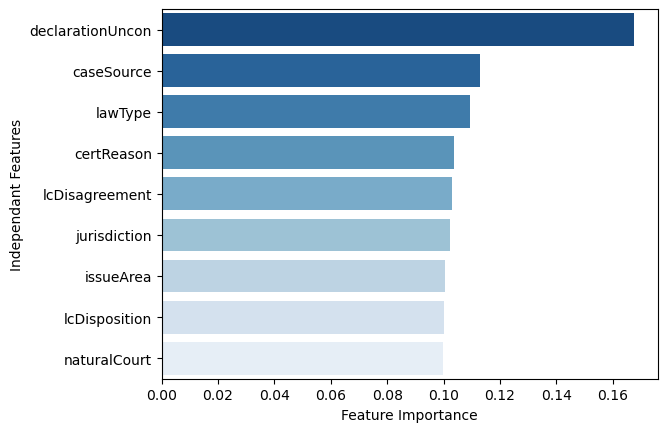

In [200]:
sns.barplot(y=a["col"],x=a["fimp"],orient="h",palette=("Blues_r"))
plt.xlabel("Feature Importance")
plt.ylabel("Independant Features")

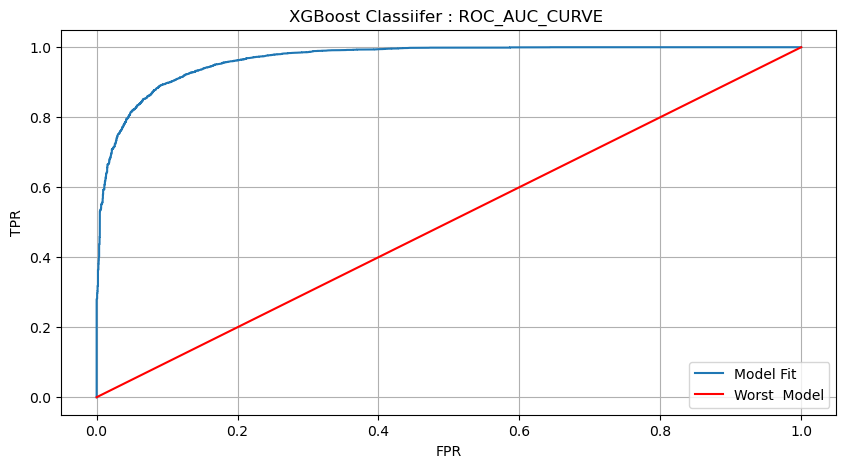

In [201]:
fpr, tpr, thresholds = roc_curve(ytest,clf_XGB.predict_proba(xtest1)[:,-1])
thresholds[0] = thresholds[0]-1
fig,ax =plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr,label="Model Fit")
ax.plot(fpr,fpr,color='r',label="Worst  Model")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")


# ax1 = ax.twinx()

# ax1.plot(fpr,thresholds,color="g")
# ax1.set_ylabel("thresholds")
plt.title("XGBoost Classiifer : ROC_AUC_CURVE ")
plt.grid()
plt.legend()

<br>

**Inferences**
<br>

0. We have predicted the winnning party based on the final selection of parameters.
1. Logistic regression is a generalized linear model (GLM) and hence it works on the fundamentals of Linear regression.Since most of our data is categorical, it does not peform well.
2. Tree based algorithms such as Decision Tree, Random Forests and boosting algorithms were used as they grasped the relationship between predictor and target variables.
3. The advantages of XGBoost such as parallel learning was clearly seen as we were working on a large dataset (as the time reduced )
4. Best model accuracy and ROC_AUC_SCORE was provided by RandomForestClassifier

## <font color=blue>10. Comparing Model Performance </font>


LR: 0.588118 (0.011189)
ADA: 0.639975 (0.008803)
GBM: 0.759014 (0.005260)
CART: 0.888416 (0.007327)
RF: 0.953309 (0.003522)
XGBM: 0.967592 (0.002683)


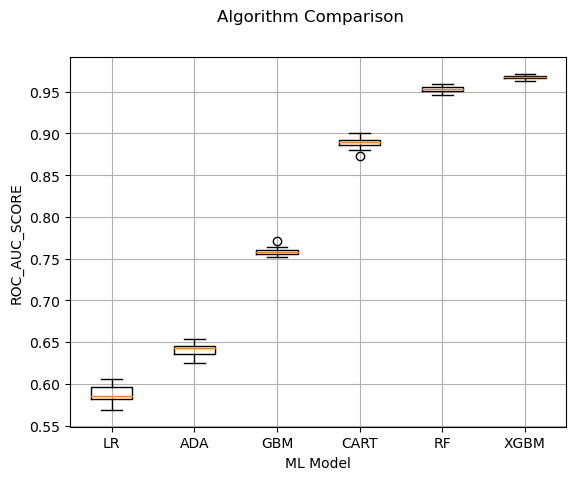

In [202]:
seed = 7
# prepare models
import time
models = []
models.append(('LR', LogisticRegression()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier(n_estimators=500,random_state=4)))
models.append(('CART', DecisionTreeClassifier(random_state=4,max_depth=14)))
models.append(('RF', RandomForestClassifier(random_state=4,n_estimators=200,max_depth=14)))
models.append(('XGBM', XGBClassifier(random_state=4,n_estimators=450,eval_metric='logloss')))
# evaluate each model in turn
results = []
names = []
time_list= []
std11 =[]
scoring = 'roc_auc'
for name, model in models:
    start = time.time()
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, xtrain1, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    end=time.time()
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    time_list.append(end-start)
    std11.append(cv_results.std())
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel("ROC_AUC_SCORE")
plt.xlabel("ML Model")
plt.grid()
plt.show()

<AxesSubplot:xlabel='Standard Deviation', ylabel='Model'>

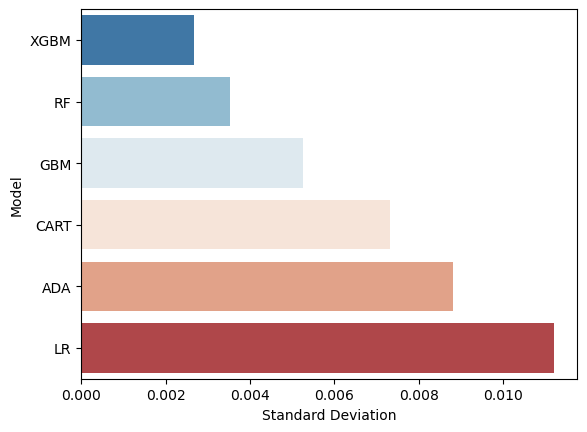

In [203]:
a = pd.DataFrame({"Model":names,"Standard Deviation":std11}).sort_values("Standard Deviation")
sns.barplot(y=a["Model"],x=a["Standard Deviation"],orient="h",palette=("RdBu_r"))


LR: 0.637996 (0.005943)
ADA: 0.650334 (0.006054)
GBM: 0.719110 (0.007904)
CART: 0.804811 (0.009376)
RF: 0.866251 (0.005436)
XGBM: 0.903821 (0.004667)


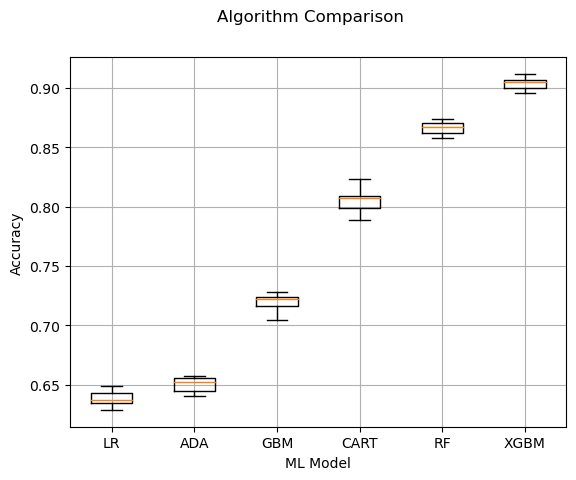

In [204]:
seed = 7
# prepare models
import time
models = []
models.append(('LR', LogisticRegression()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier(n_estimators=500,random_state=4)))
models.append(('CART', DecisionTreeClassifier(random_state=4,max_depth=14)))
models.append(('RF', RandomForestClassifier(random_state=4,n_estimators=200,max_depth=14)))
models.append(('XGBM', XGBClassifier(random_state=4,n_estimators=450,eval_metric='logloss')))
# evaluate each model in turn
results = []
names = []
time_list= []
scoring = 'accuracy'
for name, model in models:
    start = time.time()
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, xtrain1, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    end=time.time()
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    time_list.append(end-start)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel("Accuracy")
plt.xlabel("ML Model")
plt.grid()
plt.show()

Text(0.5, 1.0, 'Comparison of time taken by each model')

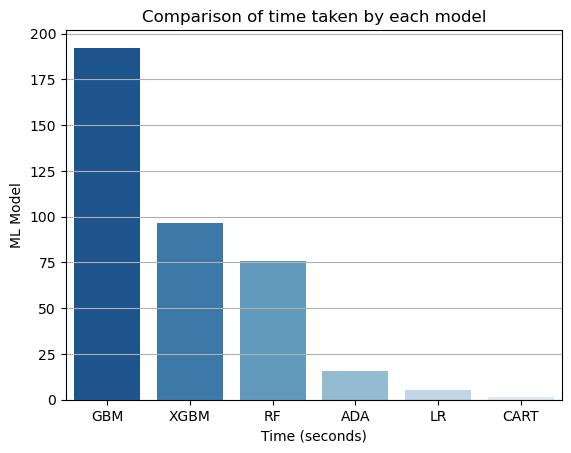

In [205]:
time_df = pd.DataFrame({"Model":names,"Time Taken for 10 Fold CV":time_list}).sort_values("Time Taken for 10 Fold CV",ascending=False)
sns.barplot(x=time_df["Model"],y=time_df["Time Taken for 10 Fold CV"],orient="v",palette=("Blues_r"))
sns.set_context("notebook")
plt.xlabel("Time (seconds)")
plt.grid(axis="y")
plt.ylabel("ML Model")
plt.title("Comparison of time taken by each model")